In [18]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
from matplotlib.pyplot import cm
from brokenaxes import brokenaxes

plt.rcParams["font.family"] = "Times New Roman"

mpl.rcParams['axes.linewidth'] = 2

In [19]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [20]:
def dkappa_dT_lineplots_T_comp(Text_dir_kappa,Graph_dir,N,U,dtau,trot):

    T_val = np.zeros(len(trot))
    
    for k in range(len(trot)):
        T_val[k] = 1/(float(dtau)*float(trot[k]))
        

    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 100)
    plt.yticks(fontsize = 100)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
        plt.errorbar(mu_val,kap,yerr=kap_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.legend(loc='lower right',ncol=1,fontsize=70)
    plt.xlim(0.5,1.1)
    #plt.xlim(-7.5,0)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks([1.00,1.02,1.04,1.06,1.08,1.10],fontsize = 100)
    plt.yticks([-0.1,-0.05,0.00,0.05,0.10],fontsize = 100)
    
    #color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        #c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
        plt.errorbar(num_den,kap,yerr=kap_std,marker = "o",markersize = 20,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.legend(loc='lower right',ncol=1,fontsize=70)
    plt.xlim(1.0,1.12)
    plt.ylim(-0.12,0.12)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_vs_density_N_%s_U_%s.png"%(Graph_dir,N,U))
    plt.close('all')   



In [56]:
def kappa_lineplots_T_comp(Text_dir_kappa,Graph_dir,N,U,dtau,trot):

    T_val = np.zeros(len(trot))
    
    for k in range(len(trot)):
        T_val[k] = 1/(float(dtau)*float(trot[k]))
        
        
    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 120)
    plt.yticks([0.0,0.05,0.1,0.15,0.2,0.25],fontsize = 120)
    #plt.ylim(-2,2)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    color_1 = iter(['red','orange','goldenrod','blue','purple']) #cm.jet(np.linspace(0, 1, int(len()/2)+1)))
    for k in range(len(trot)):
        c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])      
        plt.errorbar(num_den,kap,yerr=kap_std,c=c_1,marker = "o",markersize = 25,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    #plt.legend(loc='best',ncol=1,fontsize=80)
    #plt.xlim(0.75,1.25)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_density_N_%s_U_%s.png"%(Graph_dir,N,U))
    #plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks([-10,-7.5,-5.0,-2.5,0],fontsize = 120)
    plt.yticks([0,0.1,0.2,0.3],fontsize = 120)
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    plt.ylim(0.0,0.3)
    color_1 = iter(['red','orange','goldenrod','blue','purple'])
    for k in range(len(trot)):
        c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
        plt.errorbar(mu_val,kap,yerr=kap_std,c=c_1,marker = "o",markersize = 30,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    #plt.legend(loc='lower right',ncol=1,fontsize=70)
    #plt.xlim(-7.5,0)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))
    #plt.close('all')



    
    plt.figure(figsize = (25,20))
    plt.xticks([-4,-3,-2,-1,0])
    plt.yticks()
    plt.xlim(-4,0)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    color_1 = iter(['red','orange','goldenrod','blue','purple'])
    plt.tick_params(axis='both', which='major', direction='out', pad=20,length = 30, width = 2.5,labelsize = 120)
    plt.tick_params(axis='both', which='minor', direction='out', pad=20,length = 15, width = 1.5,labelsize = 60)
    for k in range(len(trot)):
        c_1 = next(color_1)
        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/Charge_gap_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
        mu_val,num_den,num_den_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,2])       
        plt.errorbar(mu_val,num_den,yerr=num_den_std,c=c_1,marker = "o",linewidth = 3,markersize = 30,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val[k],3))))
    plt.grid("True",which='both')
    plt.tight_layout(pad=7)
    plt.savefig("%s/Density_vs_chemical_potential_N_%s_U_%s.png"%(Graph_dir,N,U))


In [57]:
def kappa_lineplots_U_comp(Text_dir_kappa,Graph_dir,N,U,dtau,trot):

        
    
    plt.figure(figsize = (25,20))
    plt.xticks([0.90,0.95,1.00,1.05,1.10],fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['olive','cyan','green','purple','blue','orange','red','brown'])
    for k in range(len(U)):

        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U[k],dtau,N,U[k],dtau,trot)
        nden,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [1,3,4])
        #c_1 = next(color_1)
        plt.errorbar(nden,0.5*(np.add(np.asarray(kap),np.asarray(kap[::-1]))),yerr=kap_std,marker = "o",markersize = 20,linewidth = 3,elinewidth=3,capsize=10,label = "U=%s"%U[k])

    plt.grid("True",which='both')
    plt.legend(loc='best',ncol=1,fontsize=60)
    plt.xlim(0.9,1.1)
    plt.ylim(-0.02,0.005)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_density_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))
    plt.close('all')


    plt.figure(figsize = (25,20))
    plt.xticks(fontsize = 80)
    plt.yticks(fontsize = 80)
    
    #color_1 = iter(['olive','cyan','green','purple','blue','orange','red','brown'])
    for k in range(len(U)):

        filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U[k],dtau,N,U[k],dtau,trot)
        mu_val,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,3,4])
        #c_1 = next(color_1)
        plt.errorbar(mu_val,kap,yerr=kap_std,marker = "o",markersize = 20,linewidth = 3,elinewidth=3,capsize=10,label = "U=%s"%U[k])

    plt.grid("True",which='both')
    plt.legend(loc='best',ncol=1,fontsize=50)
    plt.xlim(-1.5,1.5)
    #plt.ylim(-5.2,5.2)
    plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
    plt.tight_layout()
    plt.savefig("%s/TDOS_vs_chemical_potential_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))
    plt.close('all')


In [58]:
def n_c_plot(Graph_dir,N):

    T_4p5 = [0.4787234042553192, 0.5, 0.5283687943262412, 0.5602836879432624, 0.5886524822695036, 0.6170212765957448, 0.6666666666666667, 0.7092198581560285, 0.769503546099291, 0.8297872340425534, 0.9113475177304966, 1, 1.0283687943262412] 
    nc_4p5 = [1.053283582089552,1.055820895522388,1.057910447761194,1.058358208955224,1.057910447761194,1.0588059701492536,1.0598507462686566, 1.057313432835821,1.0588059701492536, 1.0571641791044775, 1.051641791044776,  1.0408955223880596, 1.0301492537313433]

    T_6 = [0.5, 0.5283687943262412, 0.5567375886524824, 0.5886524822695036, 0.6276595744680852, 0.6666666666666667, 0.7163120567375887, 0.769503546099291, 0.8333333333333335, 0.9078014184397163, 1, 1.1134751773049647, 1.2482269503546102, 1.4290780141843973, 1.666666666666667, 1.819148936170213, 1.8865248226950355 ]
    nc_6 = [1.0480597014925372,1.0510447761194028,1.0546268656716418,1.056268656716418,1.0610447761194028,1.0628358208955224,1.0650746268656717,1.0705970149253732,1.076268656716418,1.0823880597014925,1.088955223880597,1.0920895522388059,1.0910447761194029,1.088358208955224,1.068955223880597,1.0477611940298508,1.0301492537313433]
    #T_6 = [0.5, 0.5248226950354611, 0.5531914893617021, 0.5886524822695036, 0.624113475177305, 0.6666666666666667, 0.7127659574468086, 0.769503546099291, 0.8333333333333335, 0.9078014184397163, 1, 1.088955223880597, 1.1134751773049647, 1.25177304964539, 1.4290780141843973, 1.666666666666667, 1.819148936170213, 1.8865248226950355] 
    #nc_6 = [1.0482089552238805,1.0510447761194028,1.0546268656716418,1.056268656716418,1.0610447761194028,1.0628358208955224,1.0650746268656717, 1.0705970149253732, 1.076268656716418, 1.0823880597014925, 1.0920895522388059, 1.0910447761194029, 1.088358208955224, 1.068955223880597, 1.0477611940298508, 1.0301492537313433]

    T_8 = [0.5283687943262412, 0.5567375886524824, 0.5886524822695036, 0.624113475177305, 0.6666666666666667, 0.7127659574468086, 0.769503546099291, 0.8333333333333335, 0.9078014184397163, 1, 1.1134751773049647, 1.25177304964539, 1.4290780141843973, 1.666666666666667, 1.819148936170213, 2, 2.223404255319149, 2.50354609929078, 2.719858156028369]
    nc_8 = [1.0352238805970149, 1.0402985074626865, 1.0446268656716418, 1.0471641791044775, 1.051641791044776, 1.0538805970149254, 1.0564179104477611, 1.0622388059701493, 1.0694029850746267, 1.078955223880597, 1.0870149253731343, 1.094776119402985, 1.106268656716418, 1.1114925373134328, 1.1119402985074627, 1.1101492537313433, 1.1023880597014926, 1.0786567164179104, 1.0301492537313433] 


    plt.figure(figsize = (25,20))
    plt.xticks([0.5,1.0,1.5,2.0,2.5],fontsize = 100)
    plt.yticks([1.04,1.06,1.08,1.10,1.12],fontsize = 100)
    #plt.plot(T_val,ma.masked_less(2*np.asarray(muc_U6),0.1),c = 'red',marker = "o",markersize= 25,label = "U=6.0")
    #plt.plot(T_val,ma.masked_less(2*np.asarray(muc_U8),0.1),c = 'orange',marker = "s",markersize = 25,label = "U=8.0")
    #plt.plot(T_val,ma.masked_less(2*np.asarray(muc_U10),0.1),c= 'blue',marker = "^",markersize = 25,label = "U=10.0")
    plt.plot(T_4p5,nc_4p5,c = 'red',marker = "o",markersize= 25,label = "U=4.5")
    plt.plot(T_6,nc_6,c = 'orange',marker = "s",markersize = 25,label = "U=6.0")
    plt.plot(T_8,nc_8,c= 'blue',marker = "^",markersize = 25,label = "U=8.0")
    plt.legend(loc='best',fontsize = 70)
    plt.grid('True',which='both')
    plt.tick_params(axis='x', pad=15) 
    #plt.axhline(y=0,color = 'black',linewidth = 2)
    plt.ylim(1.032,1.12)
    plt.tight_layout()
    plt.savefig("%s/Critical_doping_charge_gap_N_%s.png"%(Graph_dir,N))


In [59]:
def n_cross_plot(Graph_dir,N):
    
#N="10"
#Dtau="0.05"
#Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_real_space_correlations_normal_averaged/Density_density_correlations_MIT'%(N,N,Dtau)

#if not os.path.exists(Graph_dir):
#    os.makedirs(Graph_dir)

    T_low = [0.5,0.526,0.556,0.588,0.625,0.667,0.714,0.769,0.833,0.909,1.0]
    T_high = [3.333,2.857,2.5,2.222,2.0,1.818,1.667,1.429,1.25,1.111]
    T = np.asarray(T_low+T_high[::-1])

    Beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80","0.70","0.60","0.55","0.50","0.45",\
            "0.40","0.35","0.30"]
    nc_U4p5 = np.asarray([1.0533962264150944, 1.0560377358490567, 1.0581132075471698, 1.058490566037736, 1.0581132075471698, 1.059056603773585,
             1.06, 1.0573584905660378,1.0591150442477877, 1.057345132743363, 1.0518584070796462, 1.0412389380530973, 1,1,1,1,1])
    T_4 = np.asarray([0.48,0.5,0.53,0.56,0.59,0.62,0.67,0.71,0.77,0.83,0.91,1.0,1.11,1.25,1.43,1.67,2.0])

    T_val = []
    for i in range(len(Beta)):
         T_val.append(1/float(Beta[i]))

    nc_U6_low = [1.0481632653061224, 1.0510204081632653, 1.0546938775510204, 1.056326530612245, 1.0610204081632653, 1.062857142857143, 1.0651020408163265, 1.0706122448979591, 1.076326530612245, 1.0824489795918368, 1.0889795918367347]
    nc_U8_low = [1.0383673469387755,1.0351020408163265, 1.0404081632653062, 1.0446938775510204, 1.0471428571428572, 1.0516326530612246, 1.0538775510204084, 1.056530612244898, 1.0622448979591839, 1.069387755102041, 1.0789795918367349]
    nc_U10_low = [1.030612244897959, 1.036122448979592, 1.036734693877551, 1.0346938775510204, 1.0408163265306123, 1.046938775510204, 1.04, 1.0483673469387755, 1.0540816326530613, 1.0597959183673469, 1.066326530612245]

    nc_U6_high = [1.0921882352941177, 1.0909882352941178, 1.0883882352941177, 1.0689882352941178, 1.0477882352941177,1.0,1.0,1.0,1.0,1.0]
    nc_U8_high = [1.087109634551495, 1.0948837209302327, 1.1064451827242525, 1.1116279069767443, 1.1120265780730898, 1.110232558139535, 1.1024584717607975, 1.0787375415282392,1.0,1.0]
    nc_U10_high = [1.0745514950166113, 1.0873089700996679, 1.0954817275747508, 1.107840531561462, 1.117607973421927, 1.1198006644518275, 1.122591362126246, 1.120996677740864, 1.1114285714285714, 1.0785382059800666]
    
    nc_U6 = np.asarray(nc_U6_low+nc_U6_high)
    nc_U8 = np.asarray(nc_U8_low+nc_U8_high)
    nc_U10 = np.asarray(nc_U10_low+nc_U10_high)

    plt.figure(figsize = (25,20))
    plt.xticks([0.5,1.0,1.5,2.0,2.5],fontsize = 100)
    plt.yticks(fontsize = 100)
    #plt.plot(T_4[2:],nc_U4p5[2:],c= 'blue',marker = "^",markersize = 25,linewidth = 2,label = r"U=4.5")    
    plt.plot(T_val[1:],nc_U6[1:],c = 'darkorange',marker = "o",markersize= 25,linewidth = 2,label = r"U=6.0")
    plt.plot(T_val[1:],nc_U8[1:],c = 'red',marker = "s",markersize = 25,linewidth = 2,label = r"U=8.0")
#plt.plot(T_val,np.ma.masked_where(nc_U10<=1,nc_U10),c = 'red',marker = "s",markersize = 25,linewidth = 2,label = r"U=8.0")
    plt.ylim(1.03,1.12)
    plt.xlim(0.45,3.0)
    plt.tick_params(axis='x', pad=15) 
    plt.grid(True,which='both')
    plt.legend(loc = 'best',fontsize = 80)
    plt.tight_layout()
    plt.savefig("%s/MIT_crossover_critical_doping_N_%s.png"%(Graph_dir,N))

In [60]:
def charge_gap_magnitude_plot(Graph_dir,N):

    N="10"
    beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80", \
            "0.70","0.60","0.55","0.50","0.45","0.40","0.35","0.30"] 
    T_val = []
    for i in range(len(beta)):
        T_val.append(1/float(beta[i]))

    plt.figure(figsize = (25,20))
    plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5],fontsize = 120)
    plt.yticks([0,0.5,1.0,1.5,2.0],fontsize = 120)
    plt.xlim(0.48,3.5)

    T = [0.5260869565217392, 0.5565217391304349, 0.5869565217391304, 0.6260869565217391, 0.6695652173913045, 0.7173913043478262, 0.7695652173913043, 0.8347826086956522, 0.9086956521739131, 1,1.1086956521739133, 1.247826086956522, 1.4260869565217393, 1.6608695652173917, 1.8086956521739135, 1.9913043478260875, 2.21304347826087, 2.486956521739131, 2.8391304347826094,3.317391304347827]
    mu_c_4p5 = [0.4838362068965518,0.47090517241379315,0.5,0.4967672413793103,0.4806034482758621,0.4741379310344829,0.4741379310344829,0.4450431034482758,0.4094827586206895, 0.33836206896551735,0,0,0,0,0,0,0,0,0,0]
    mu_c_6 = [0.7456896551724137,0.7747844827586208,0.78125,0.8168103448275863,0.8232758620689655,0.8329741379310346,0.8782327586206897,0.9202586206896552,0.9719827586206897,1.0204741379310347,1.0334051724137931,1.007543103448276,0.9655172413793105,0.7424568965517242,0.5226293103448276,0,0, 0, 0, 0]
    mu_c_8 = [1.2047413793103452, 1.2564655172413794, 1.2952586206896552, 1.3017241379310347, 1.337284482758621, 1.337284482758621, 1.3308189655172415, 1.3793103448275865, 1.4342672413793105,1.5183189655172415, 1.5700431034482762, 1.6120689655172418, 1.692887931034483, 1.6864224137931039, 1.6540948275862073, 1.599137931034483, 1.4633620689655176, 1.1174568965517242, 0, 0]
    plt.plot(T,mu_c_4p5,c = 'blue',marker = "^",markersize= 25,label = "U=4.5")
    plt.plot(T,mu_c_6,c = 'orange',marker = "s",markersize = 25,label = "U=6.0")
    plt.plot(T,mu_c_8,c= 'red',marker = "o",markersize = 25,label = "U=8.0")
    plt.ylim(-0.05,2)
    plt.grid('True',which='both')
    plt.legend(loc='best',fontsize = 80)
    #plt.axhline(y=0,color = 'black',linewidth = 2)
    #plt.ylim(1,1.10)
    plt.tight_layout()
    plt.savefig("%s/Charge_gap_N_%s.png"%(Graph_dir,N))
    

In [61]:
def main():    
    N = "10"
    dtau = "0.05"
    U = ["2.0","5.0","8.0"] #,"6.00","8.00","10.00"] #,"2.0","3.0","4.00","5.0","6.00","7.0","8.00","9.0"] #,"10.00"]
    Trot = ["20","30","40","50","60"] #,"42"]
    #Beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80","0.70","0.60","0.55","0.50","0.45","0.40","0.35","0.30"]

    
    Text_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap"%N
    Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N

    if not os.path.exists(Graph_dir_kappa):
       os.makedirs(Graph_dir_kappa)
    
    for k in range(len(U)):
        kappa_lineplots_T_comp(Text_dir_kappa,Graph_dir_kappa,N,U[k],dtau,Trot)

 
    charge_gap_magnitude_plot(Graph_dir_kappa,N)
    n_cross_plot(Graph_dir_kappa,N)

    #for k in range(len(Trot)):  
    #    kappa_lineplots_U_comp(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])
        #charge_gap_vs_chemical_potential_contour_plots(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])
        #charge_gap_vs_density_contour_plots(Text_dir_kappa,Graph_dir_kappa,N,U,dtau,Trot[k])


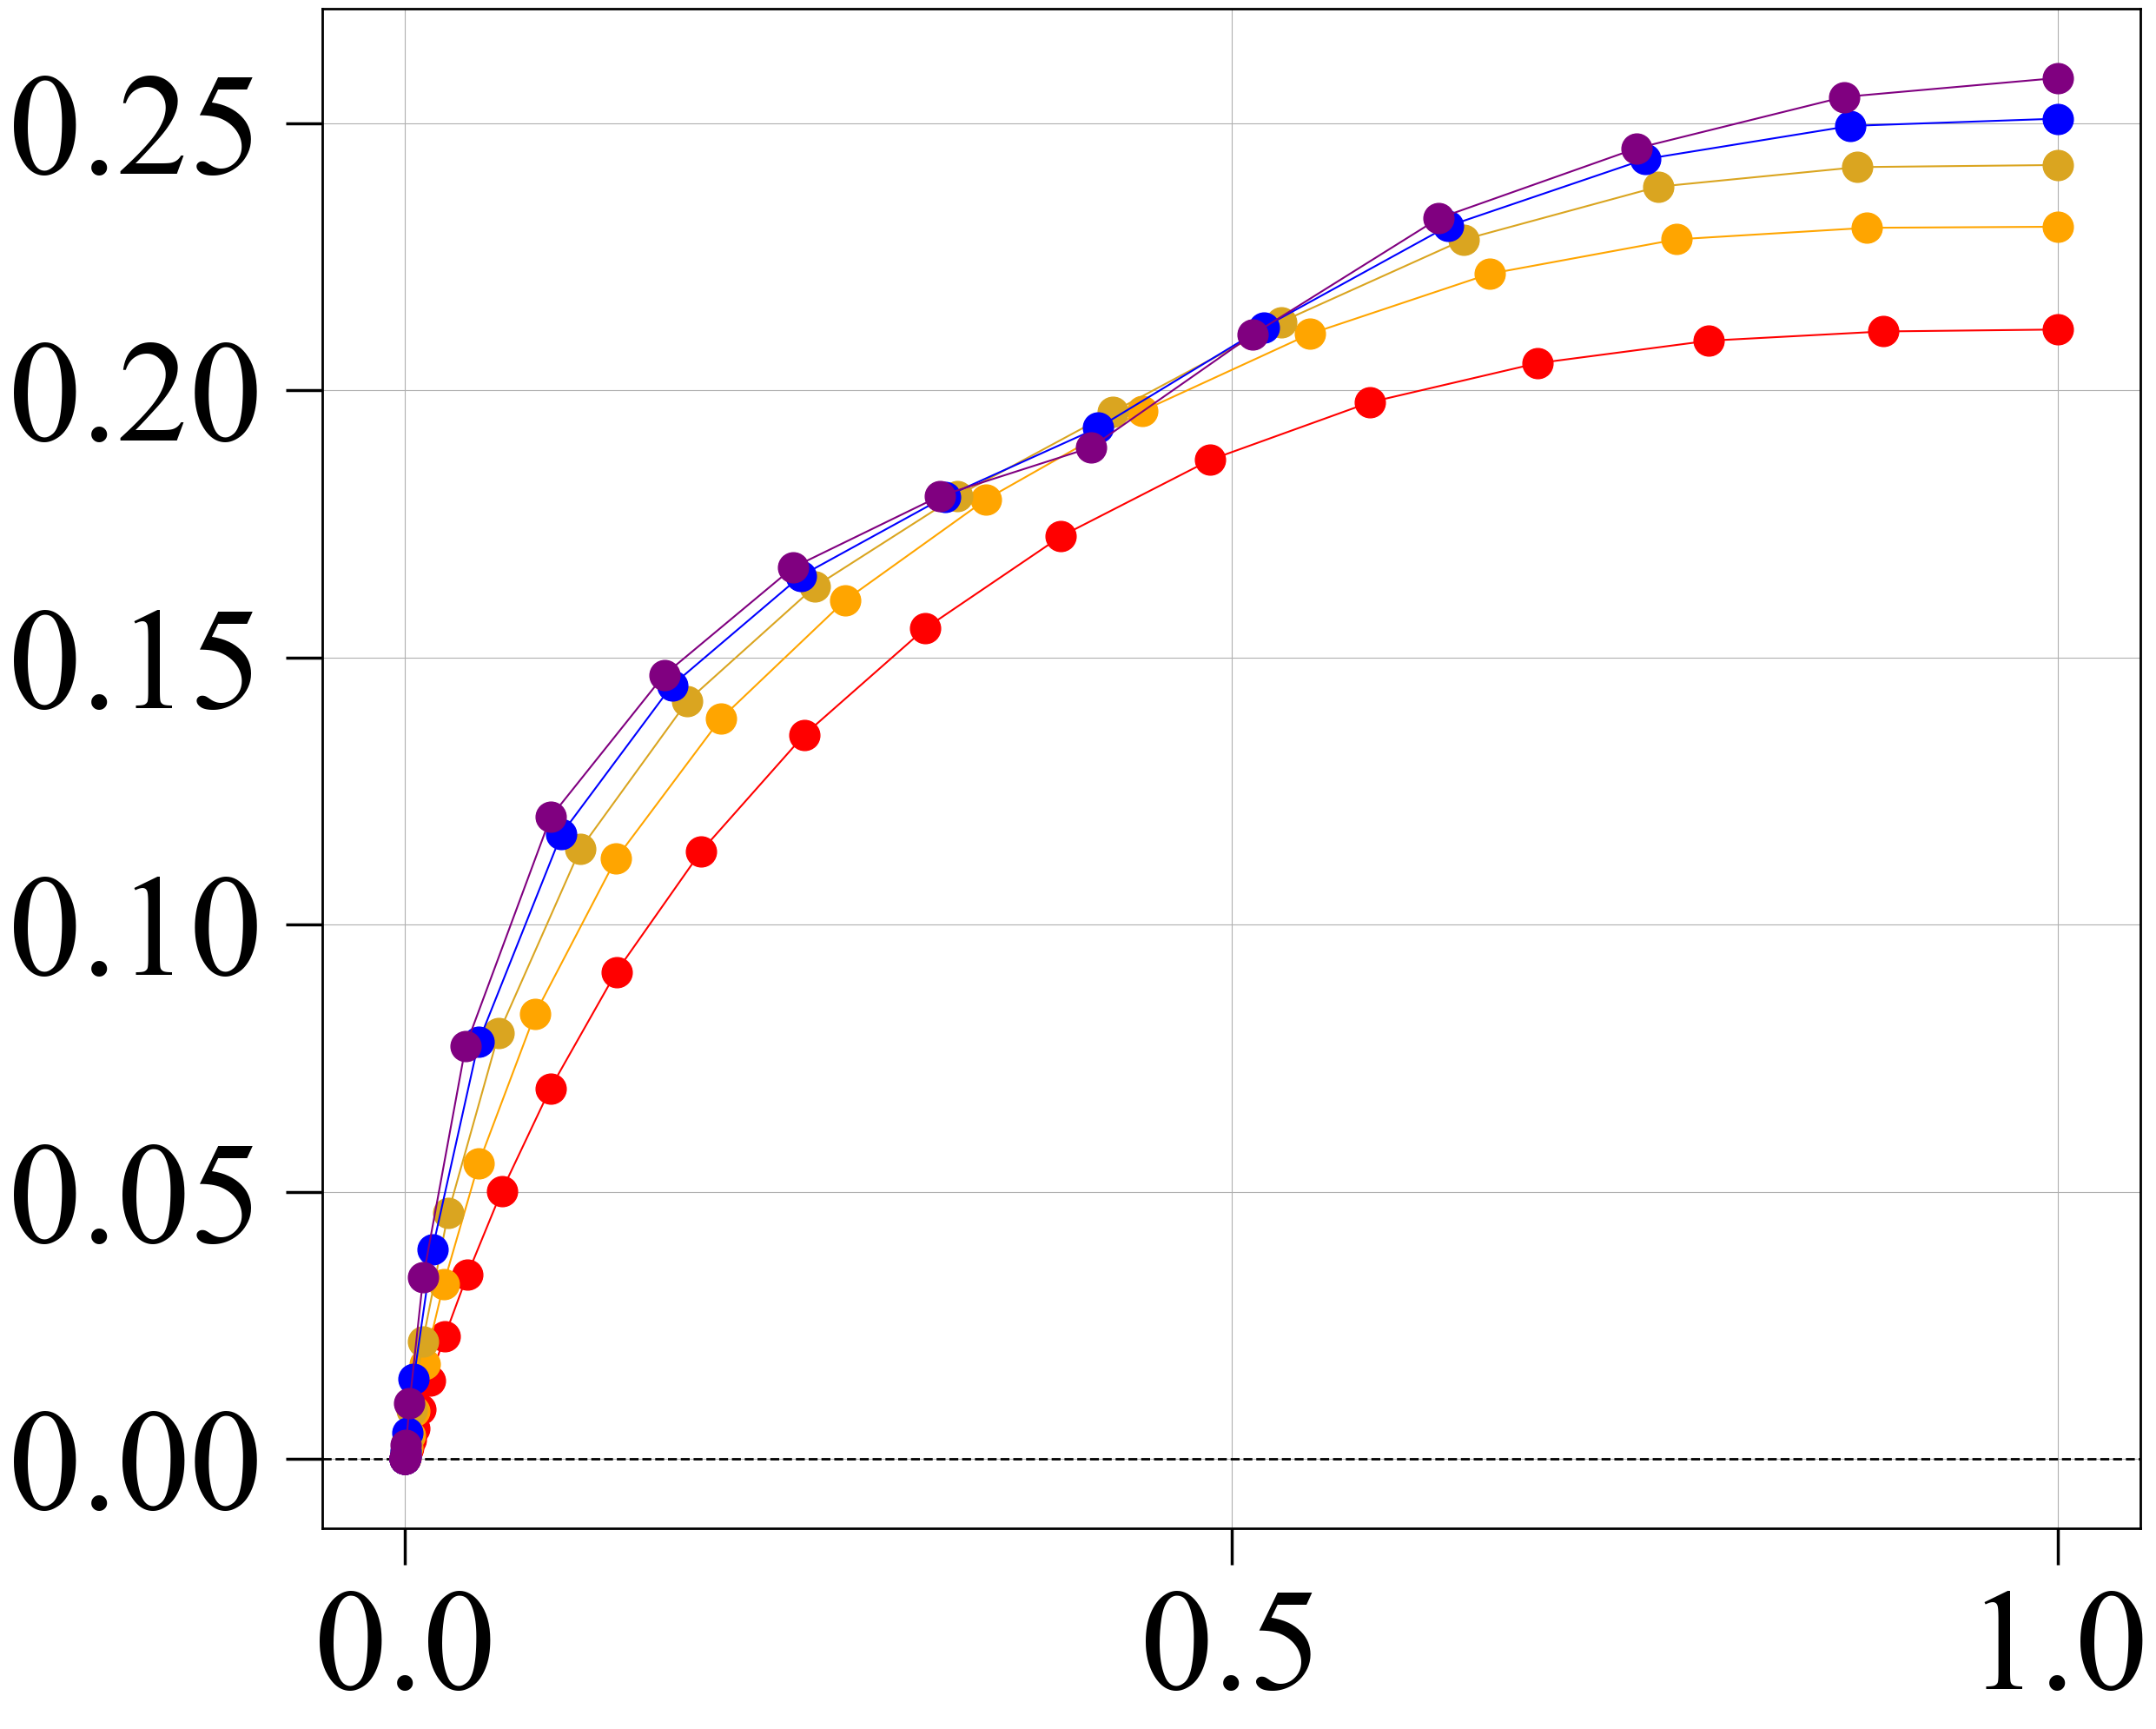

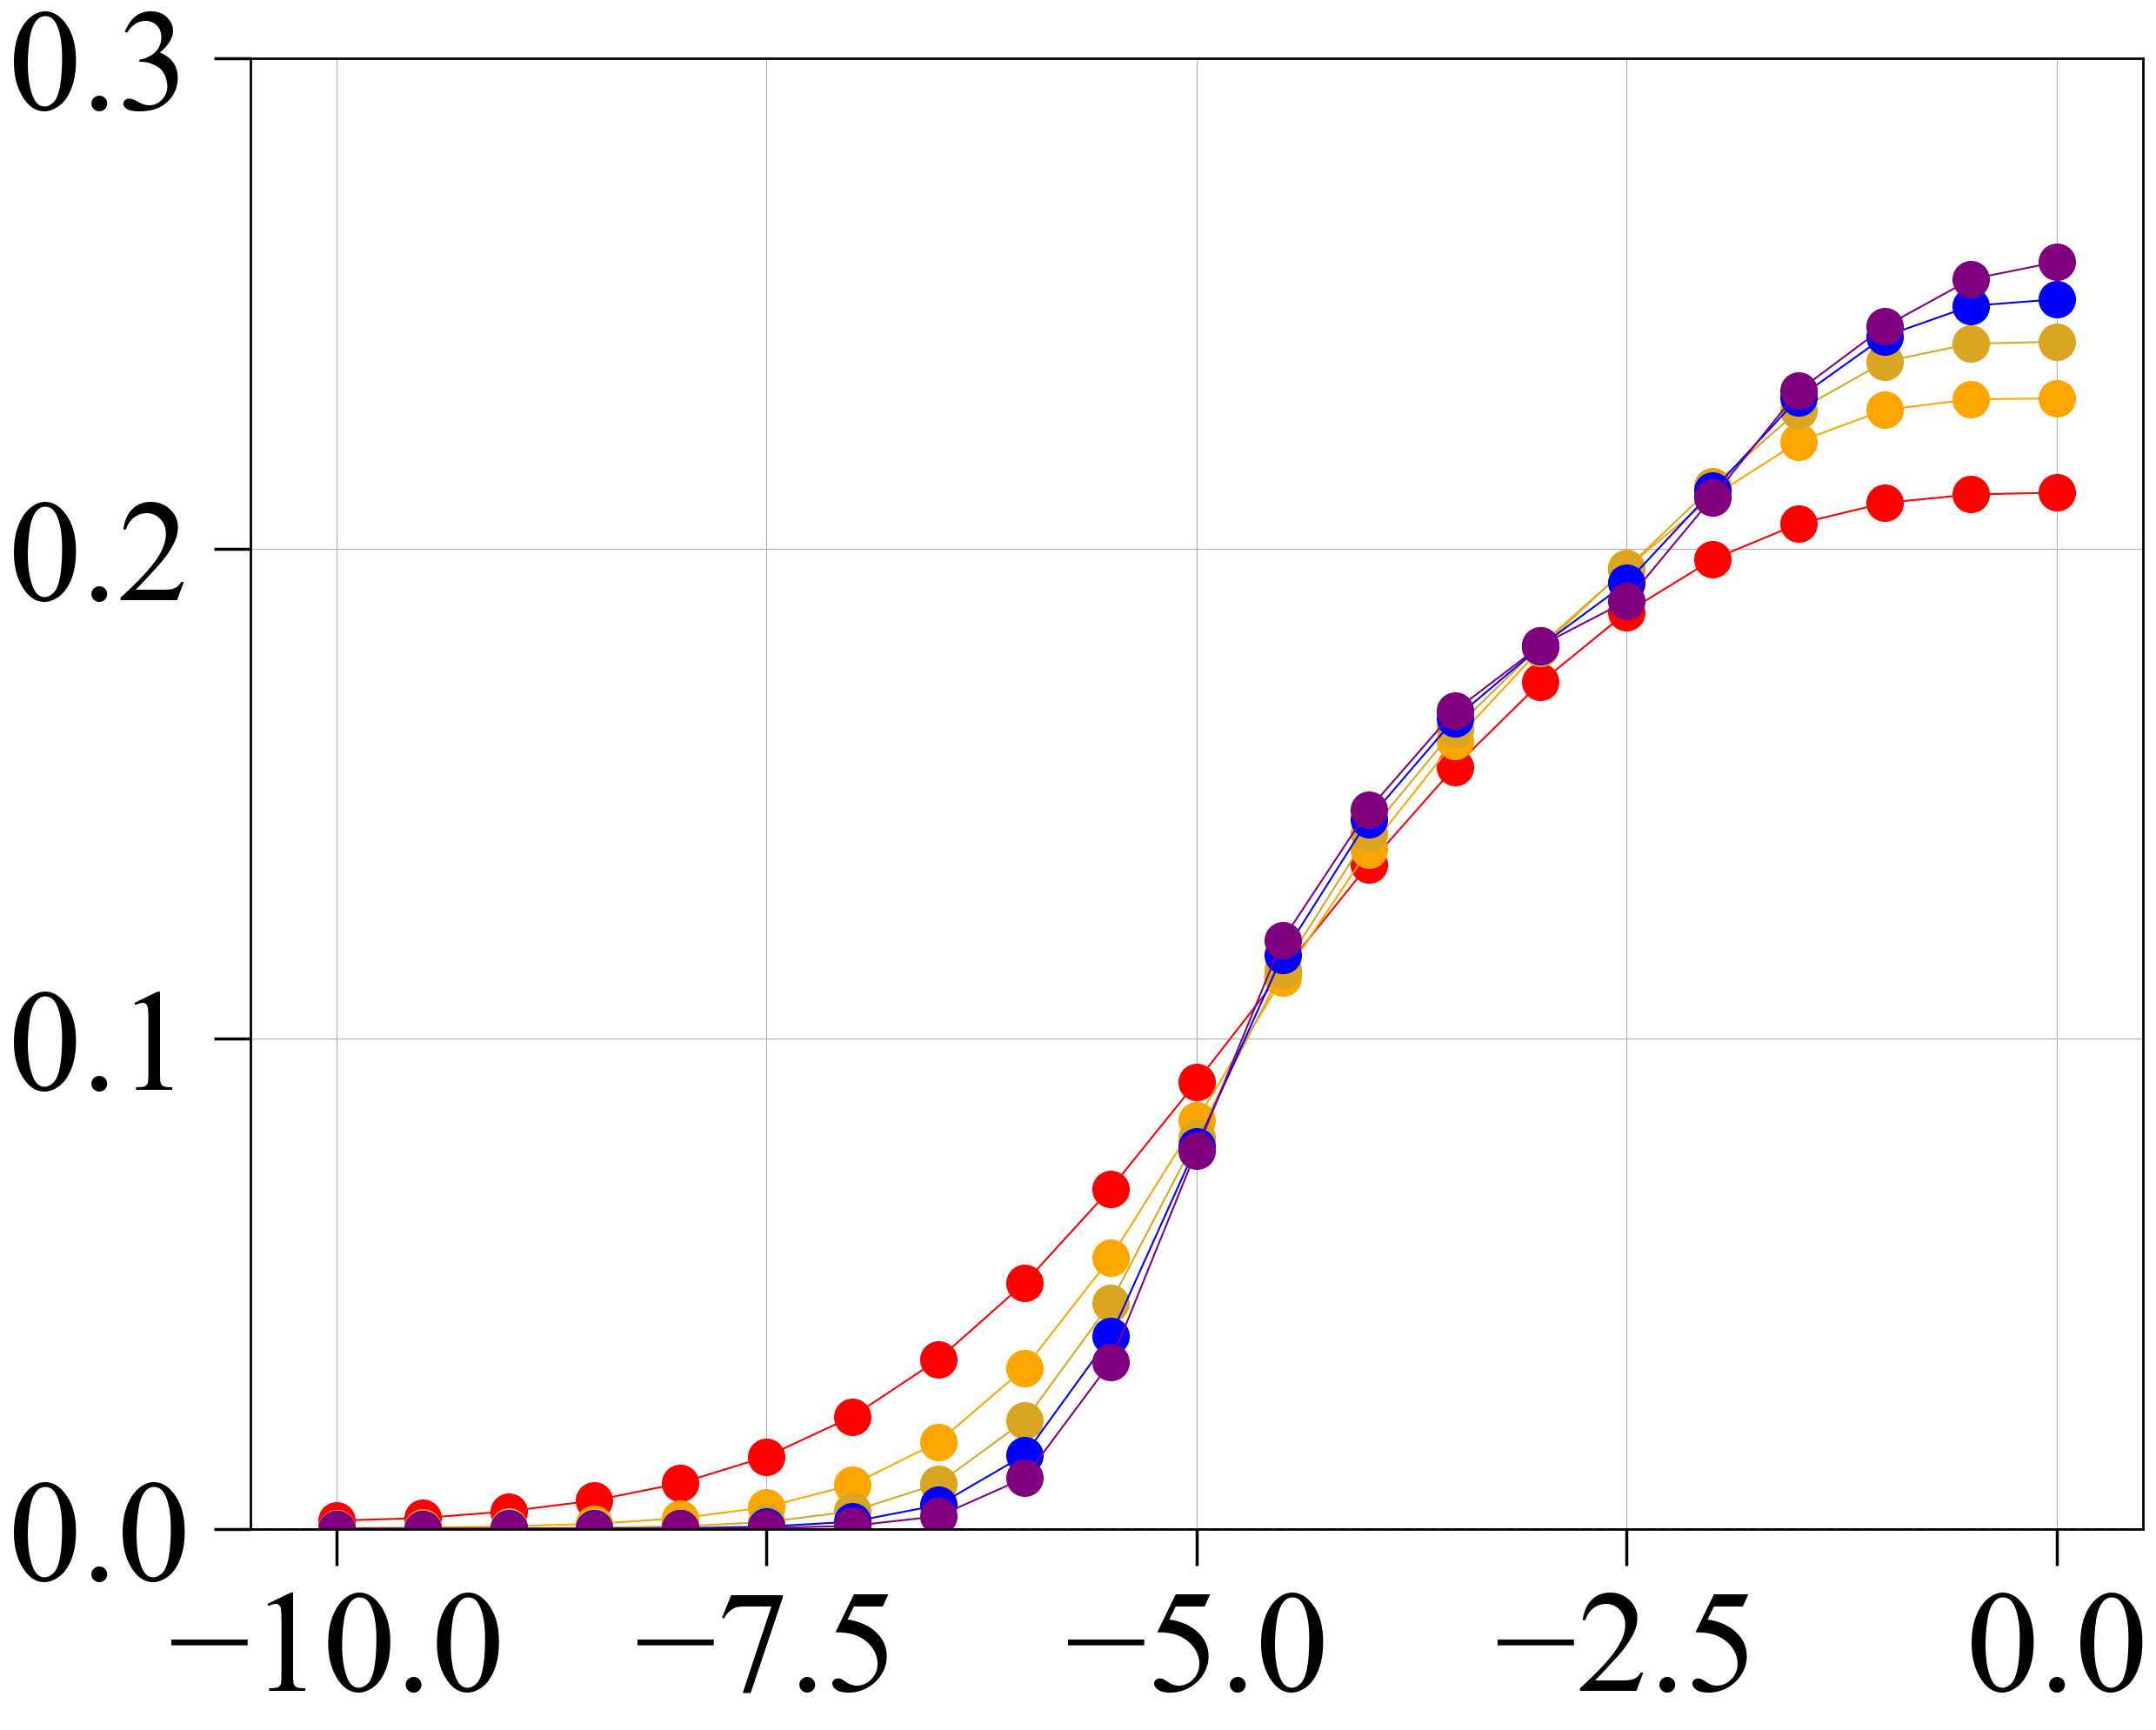

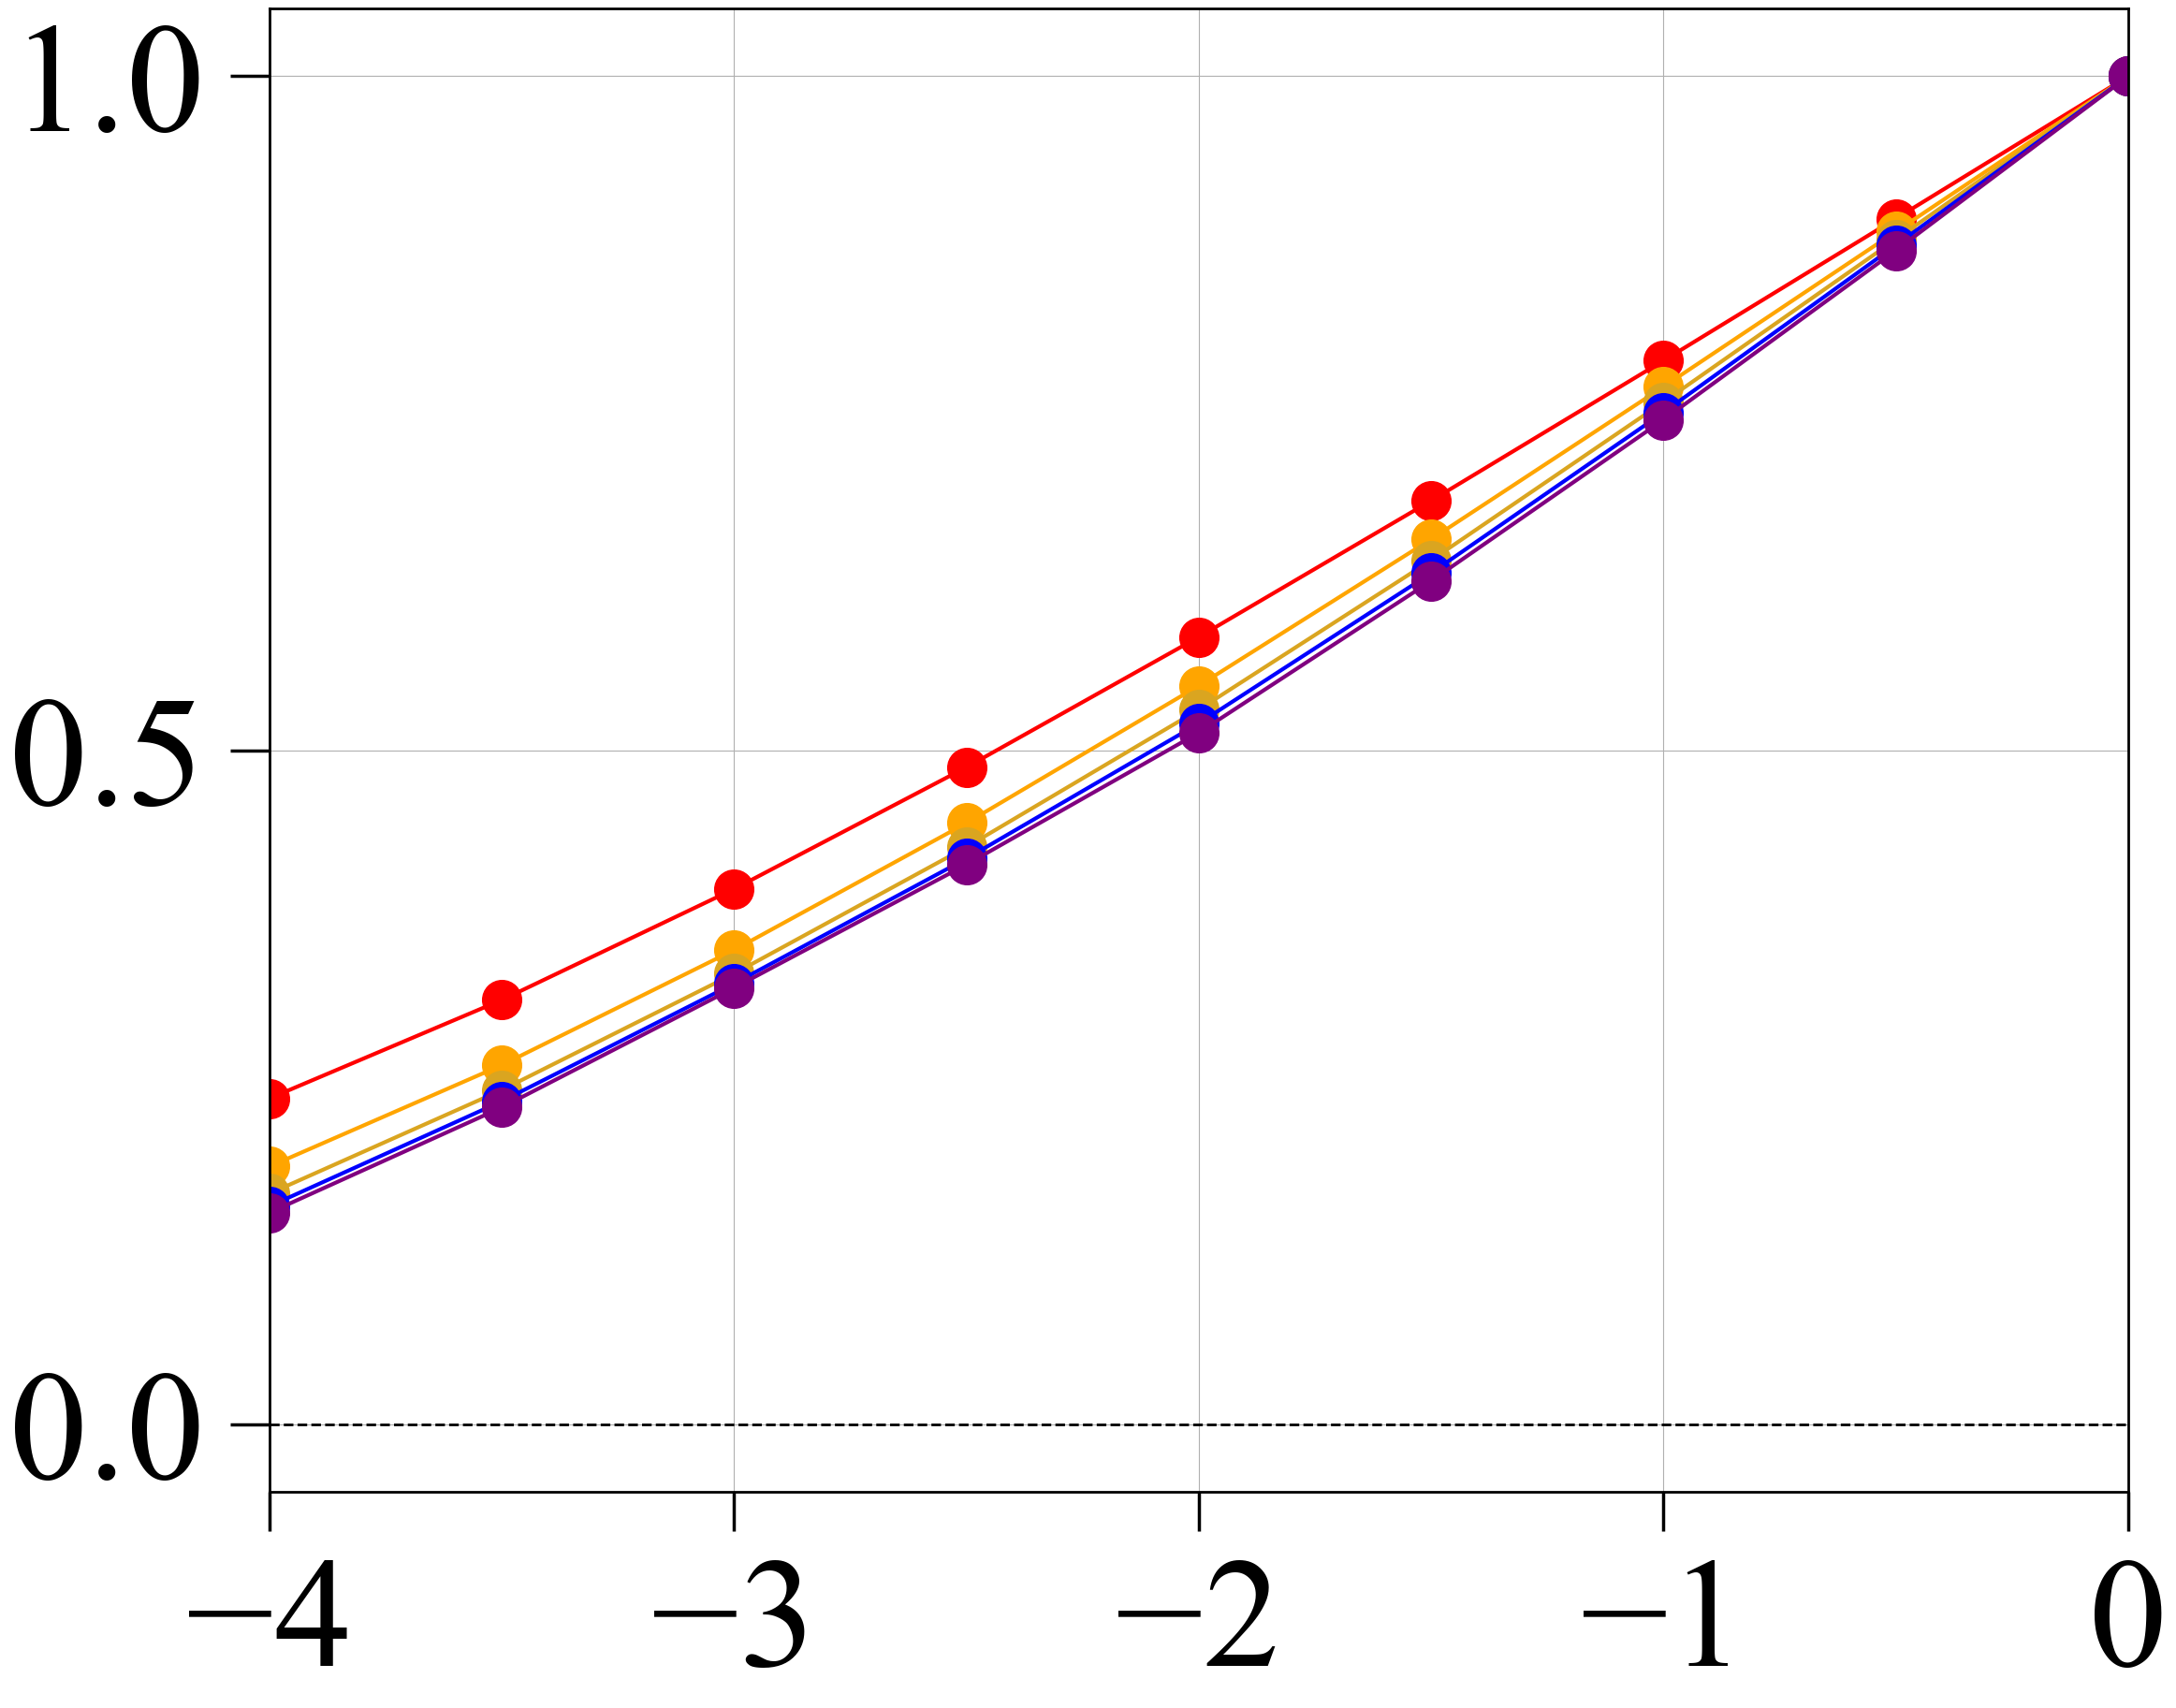

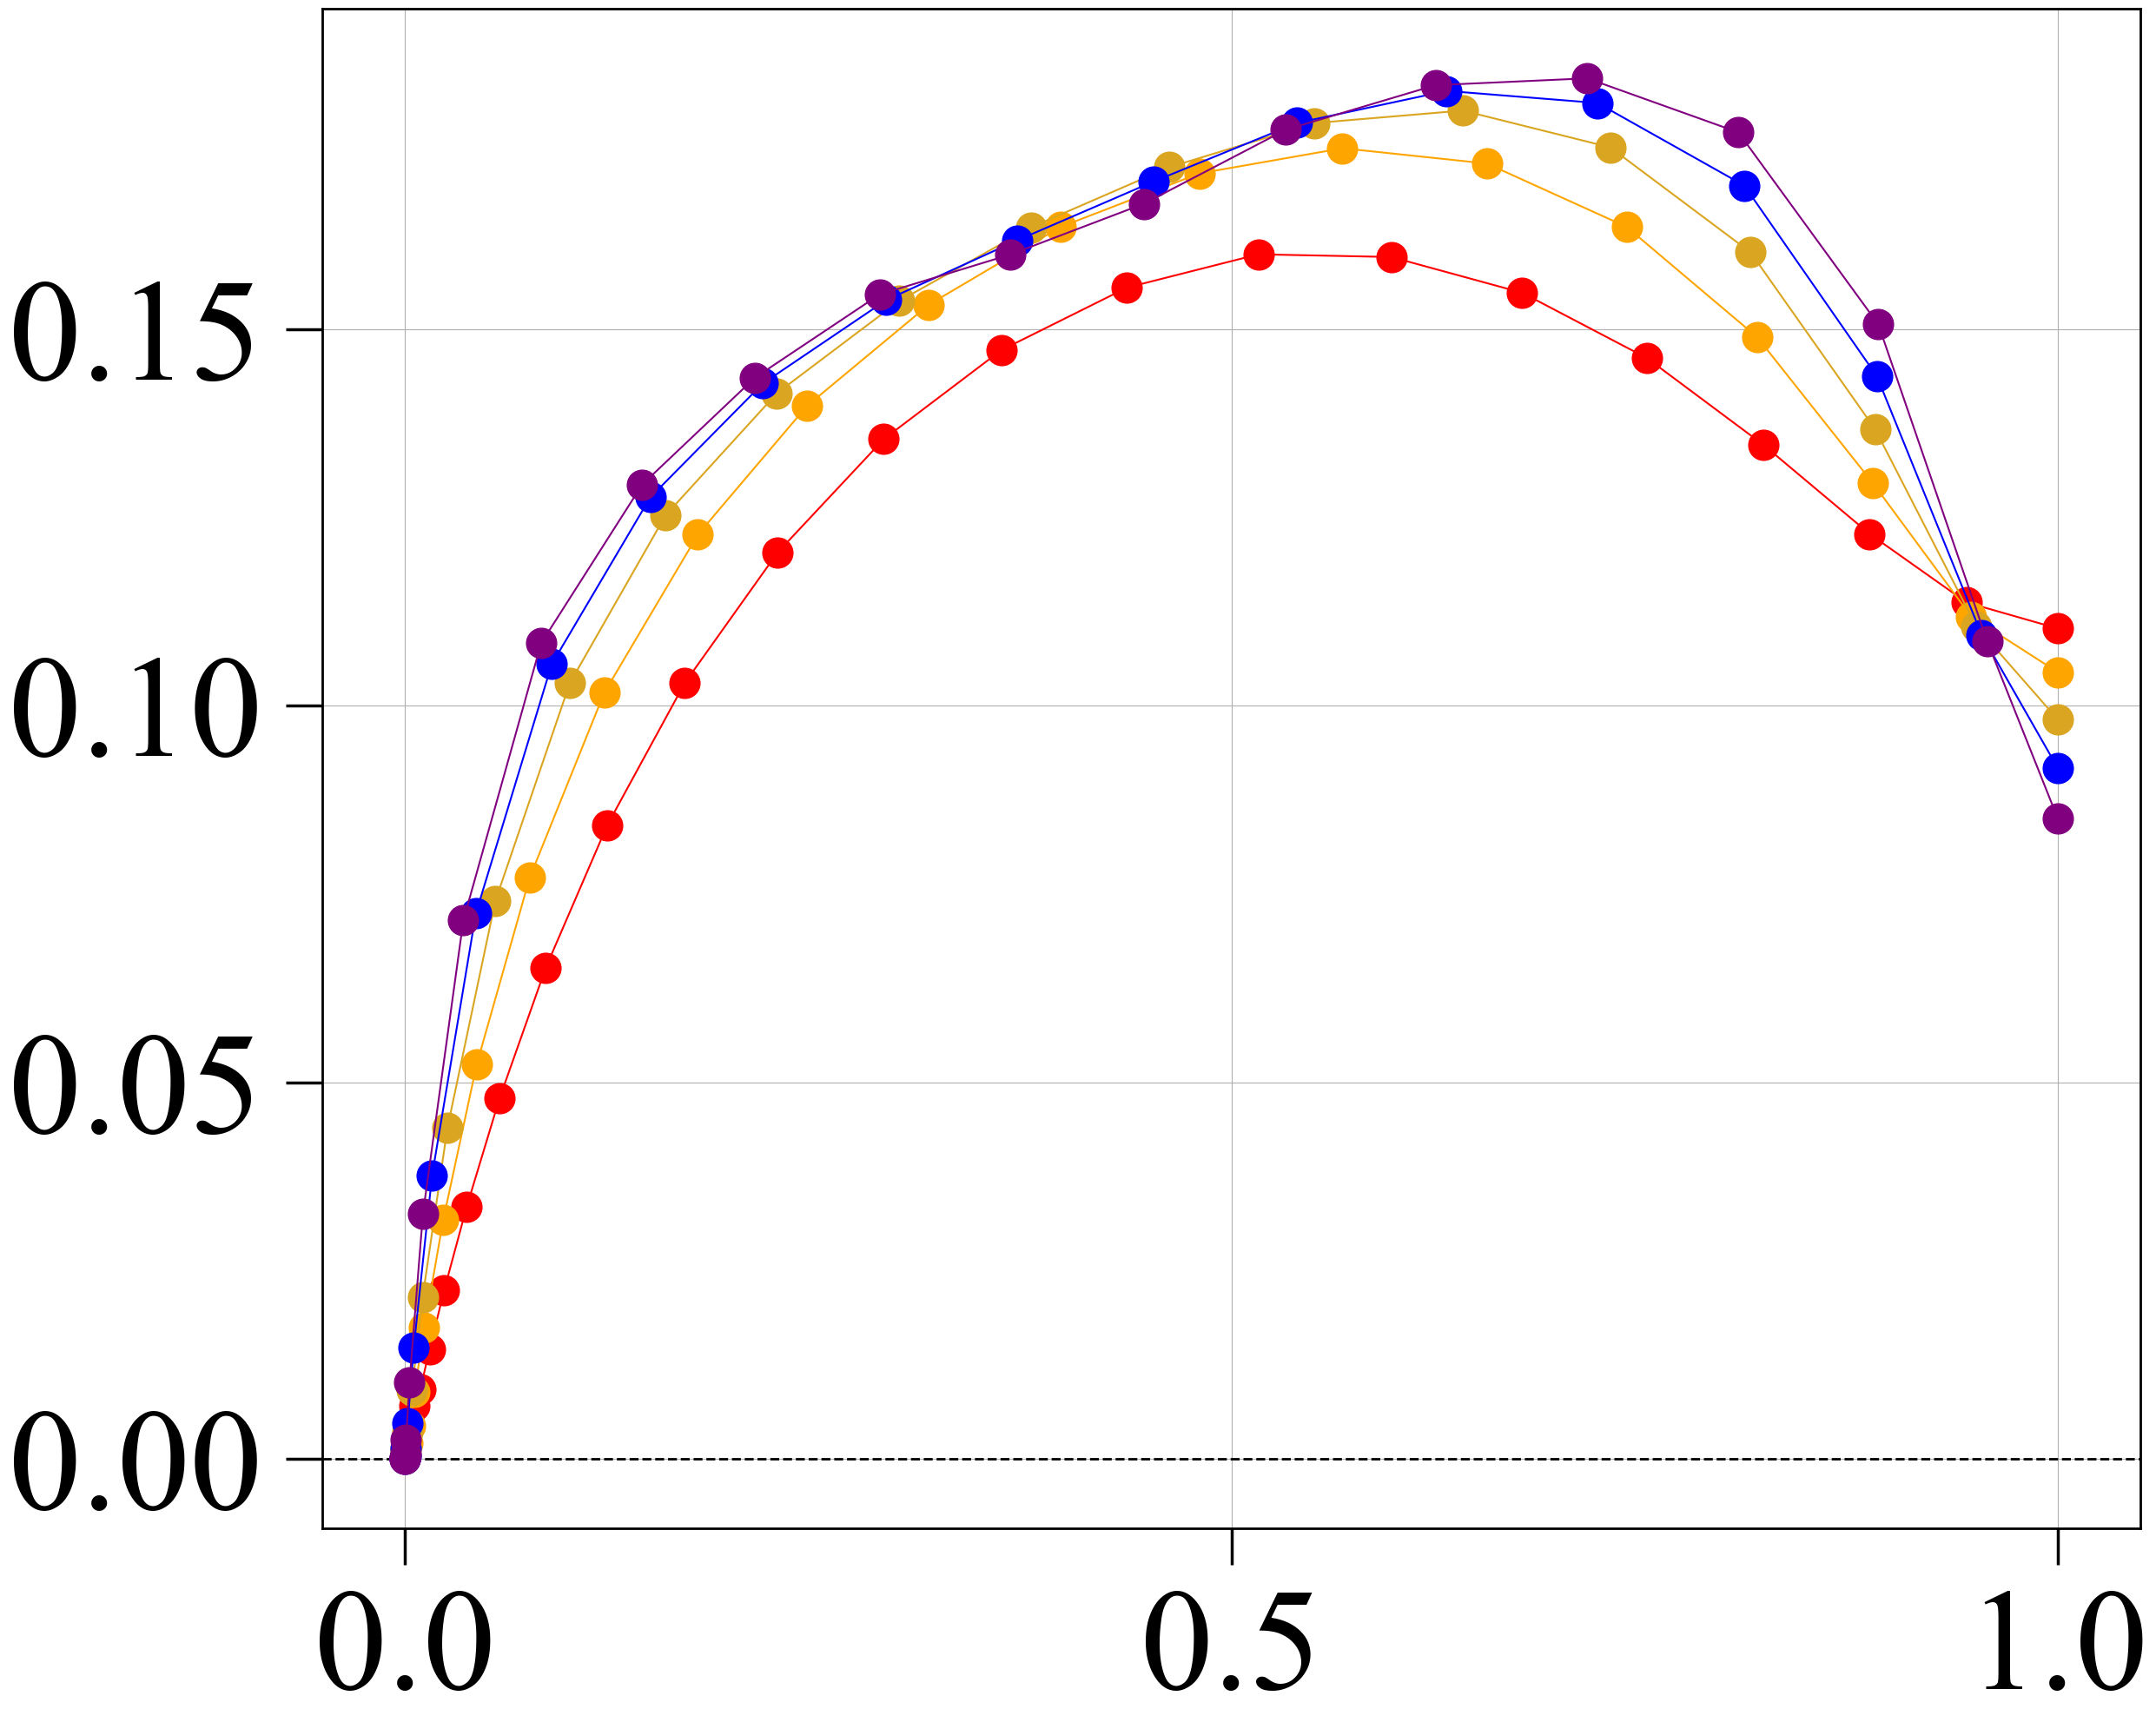

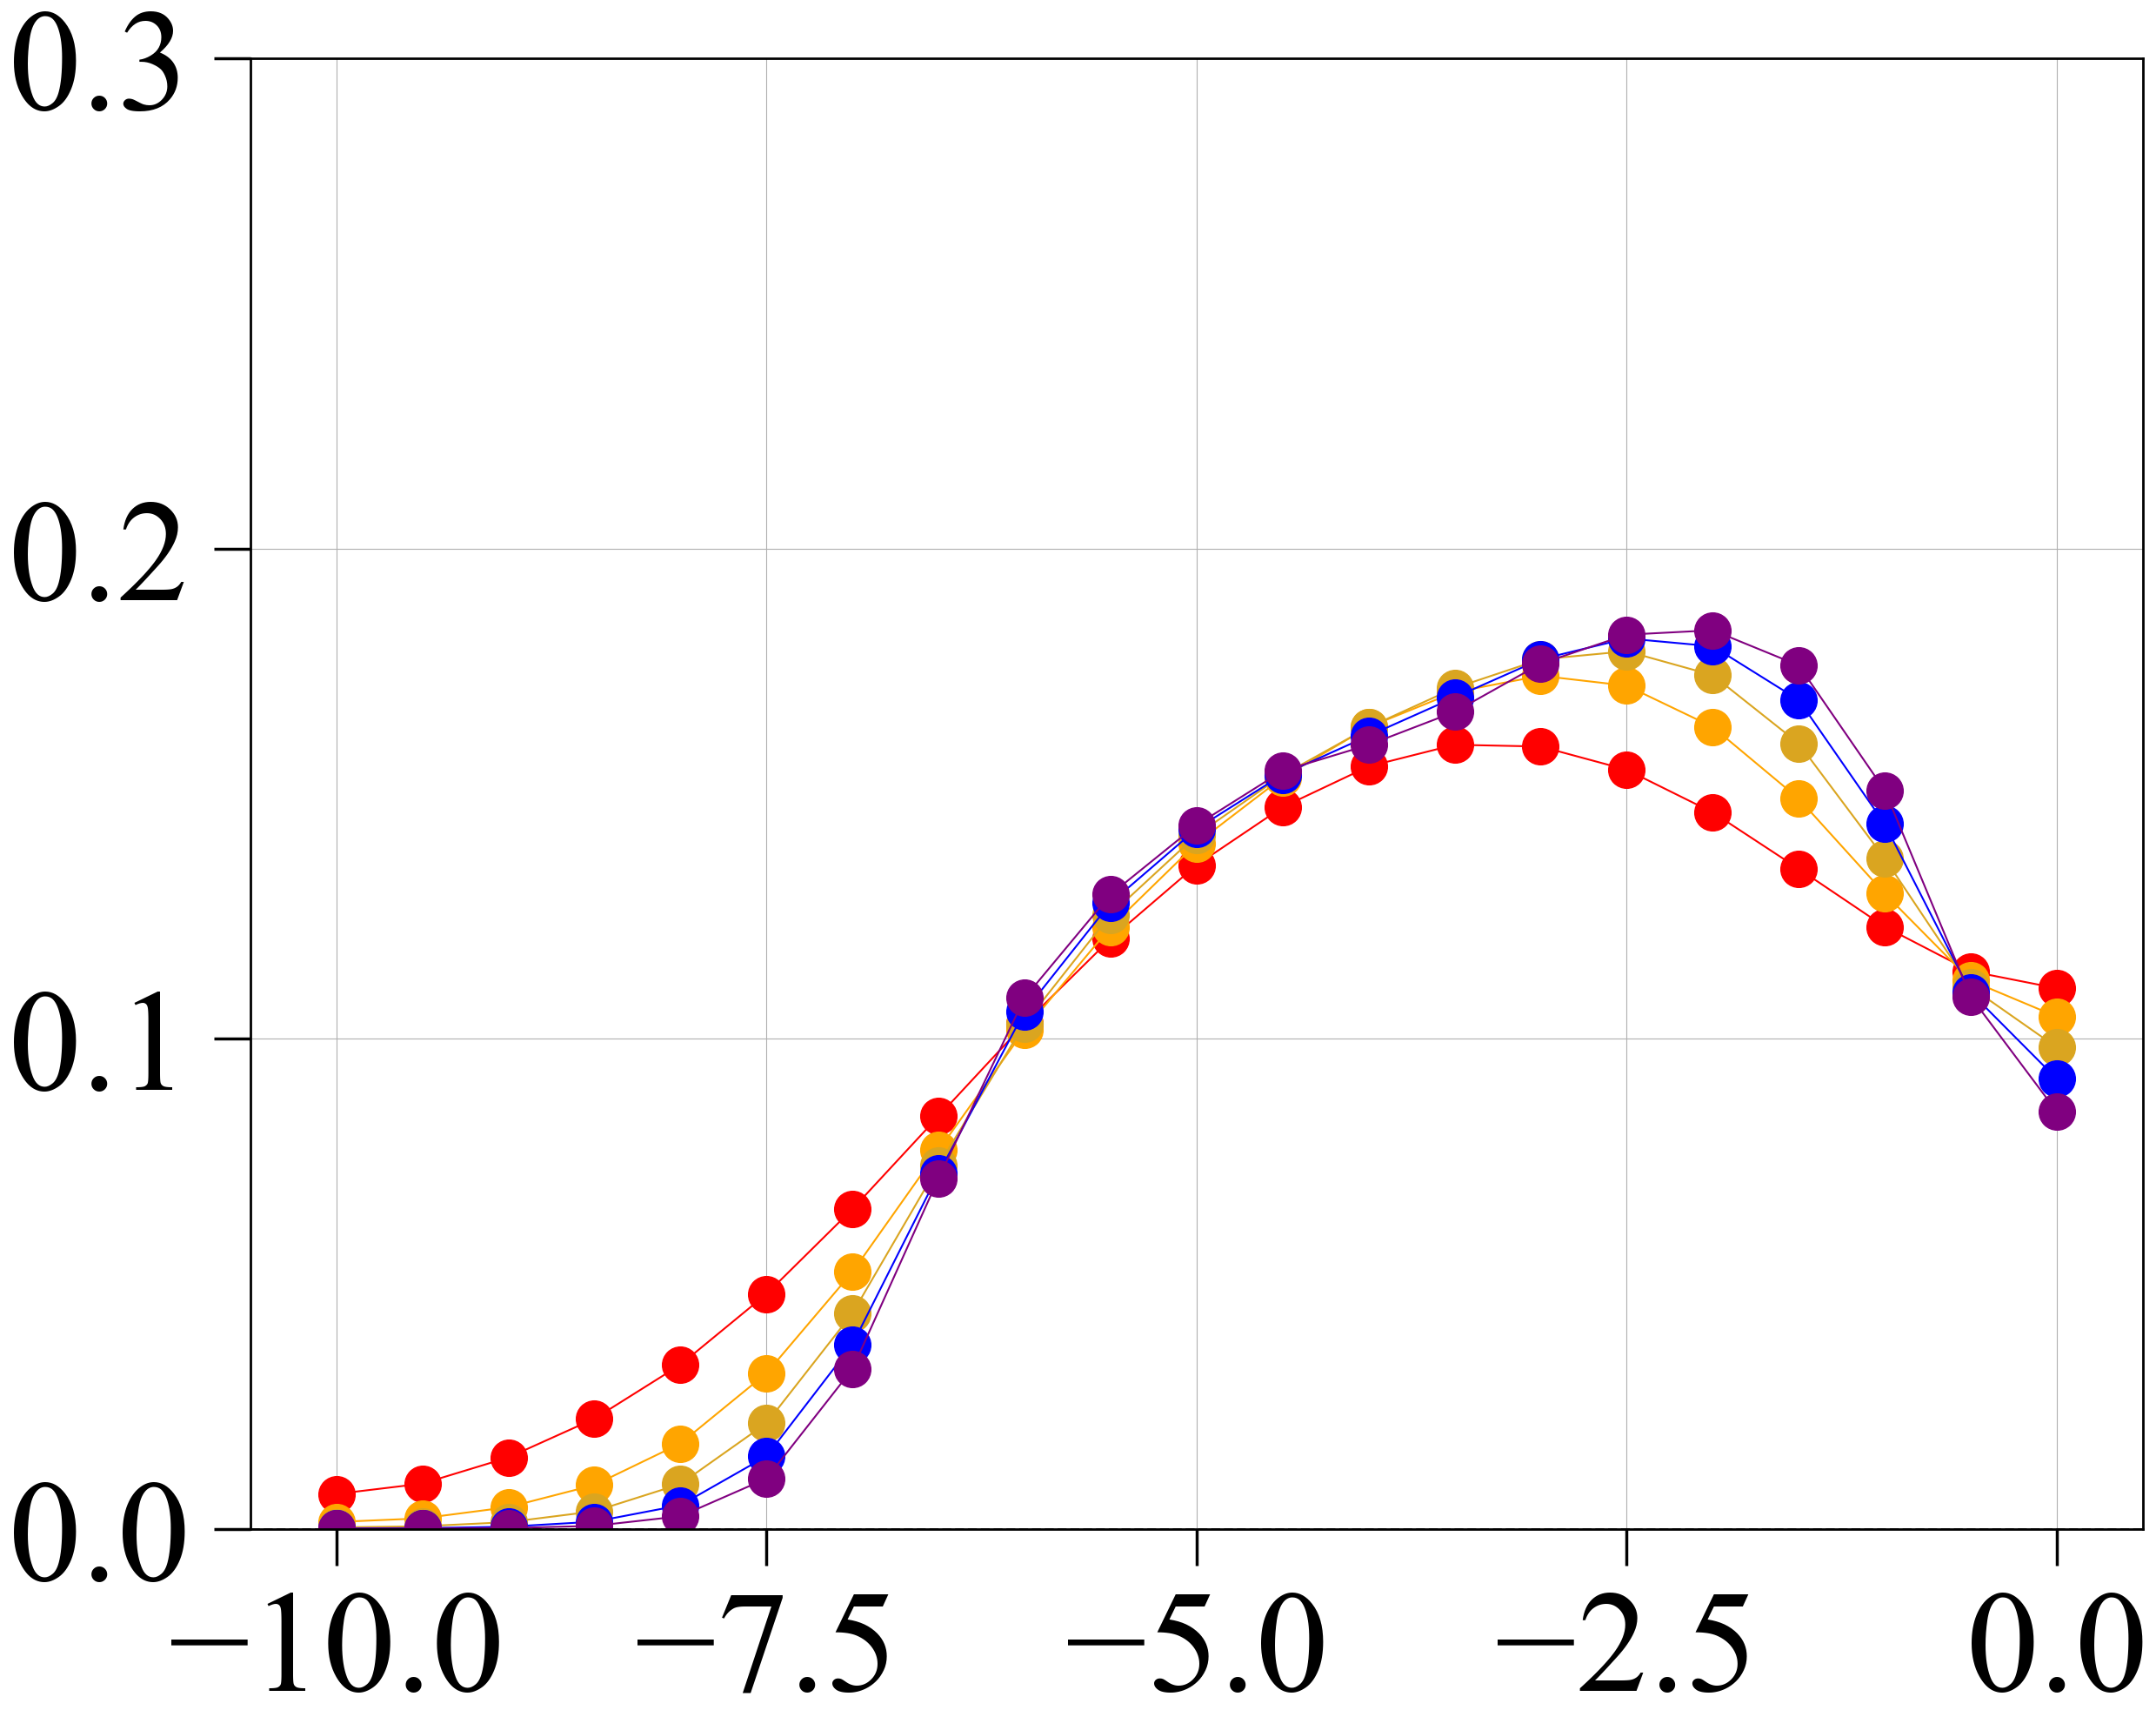

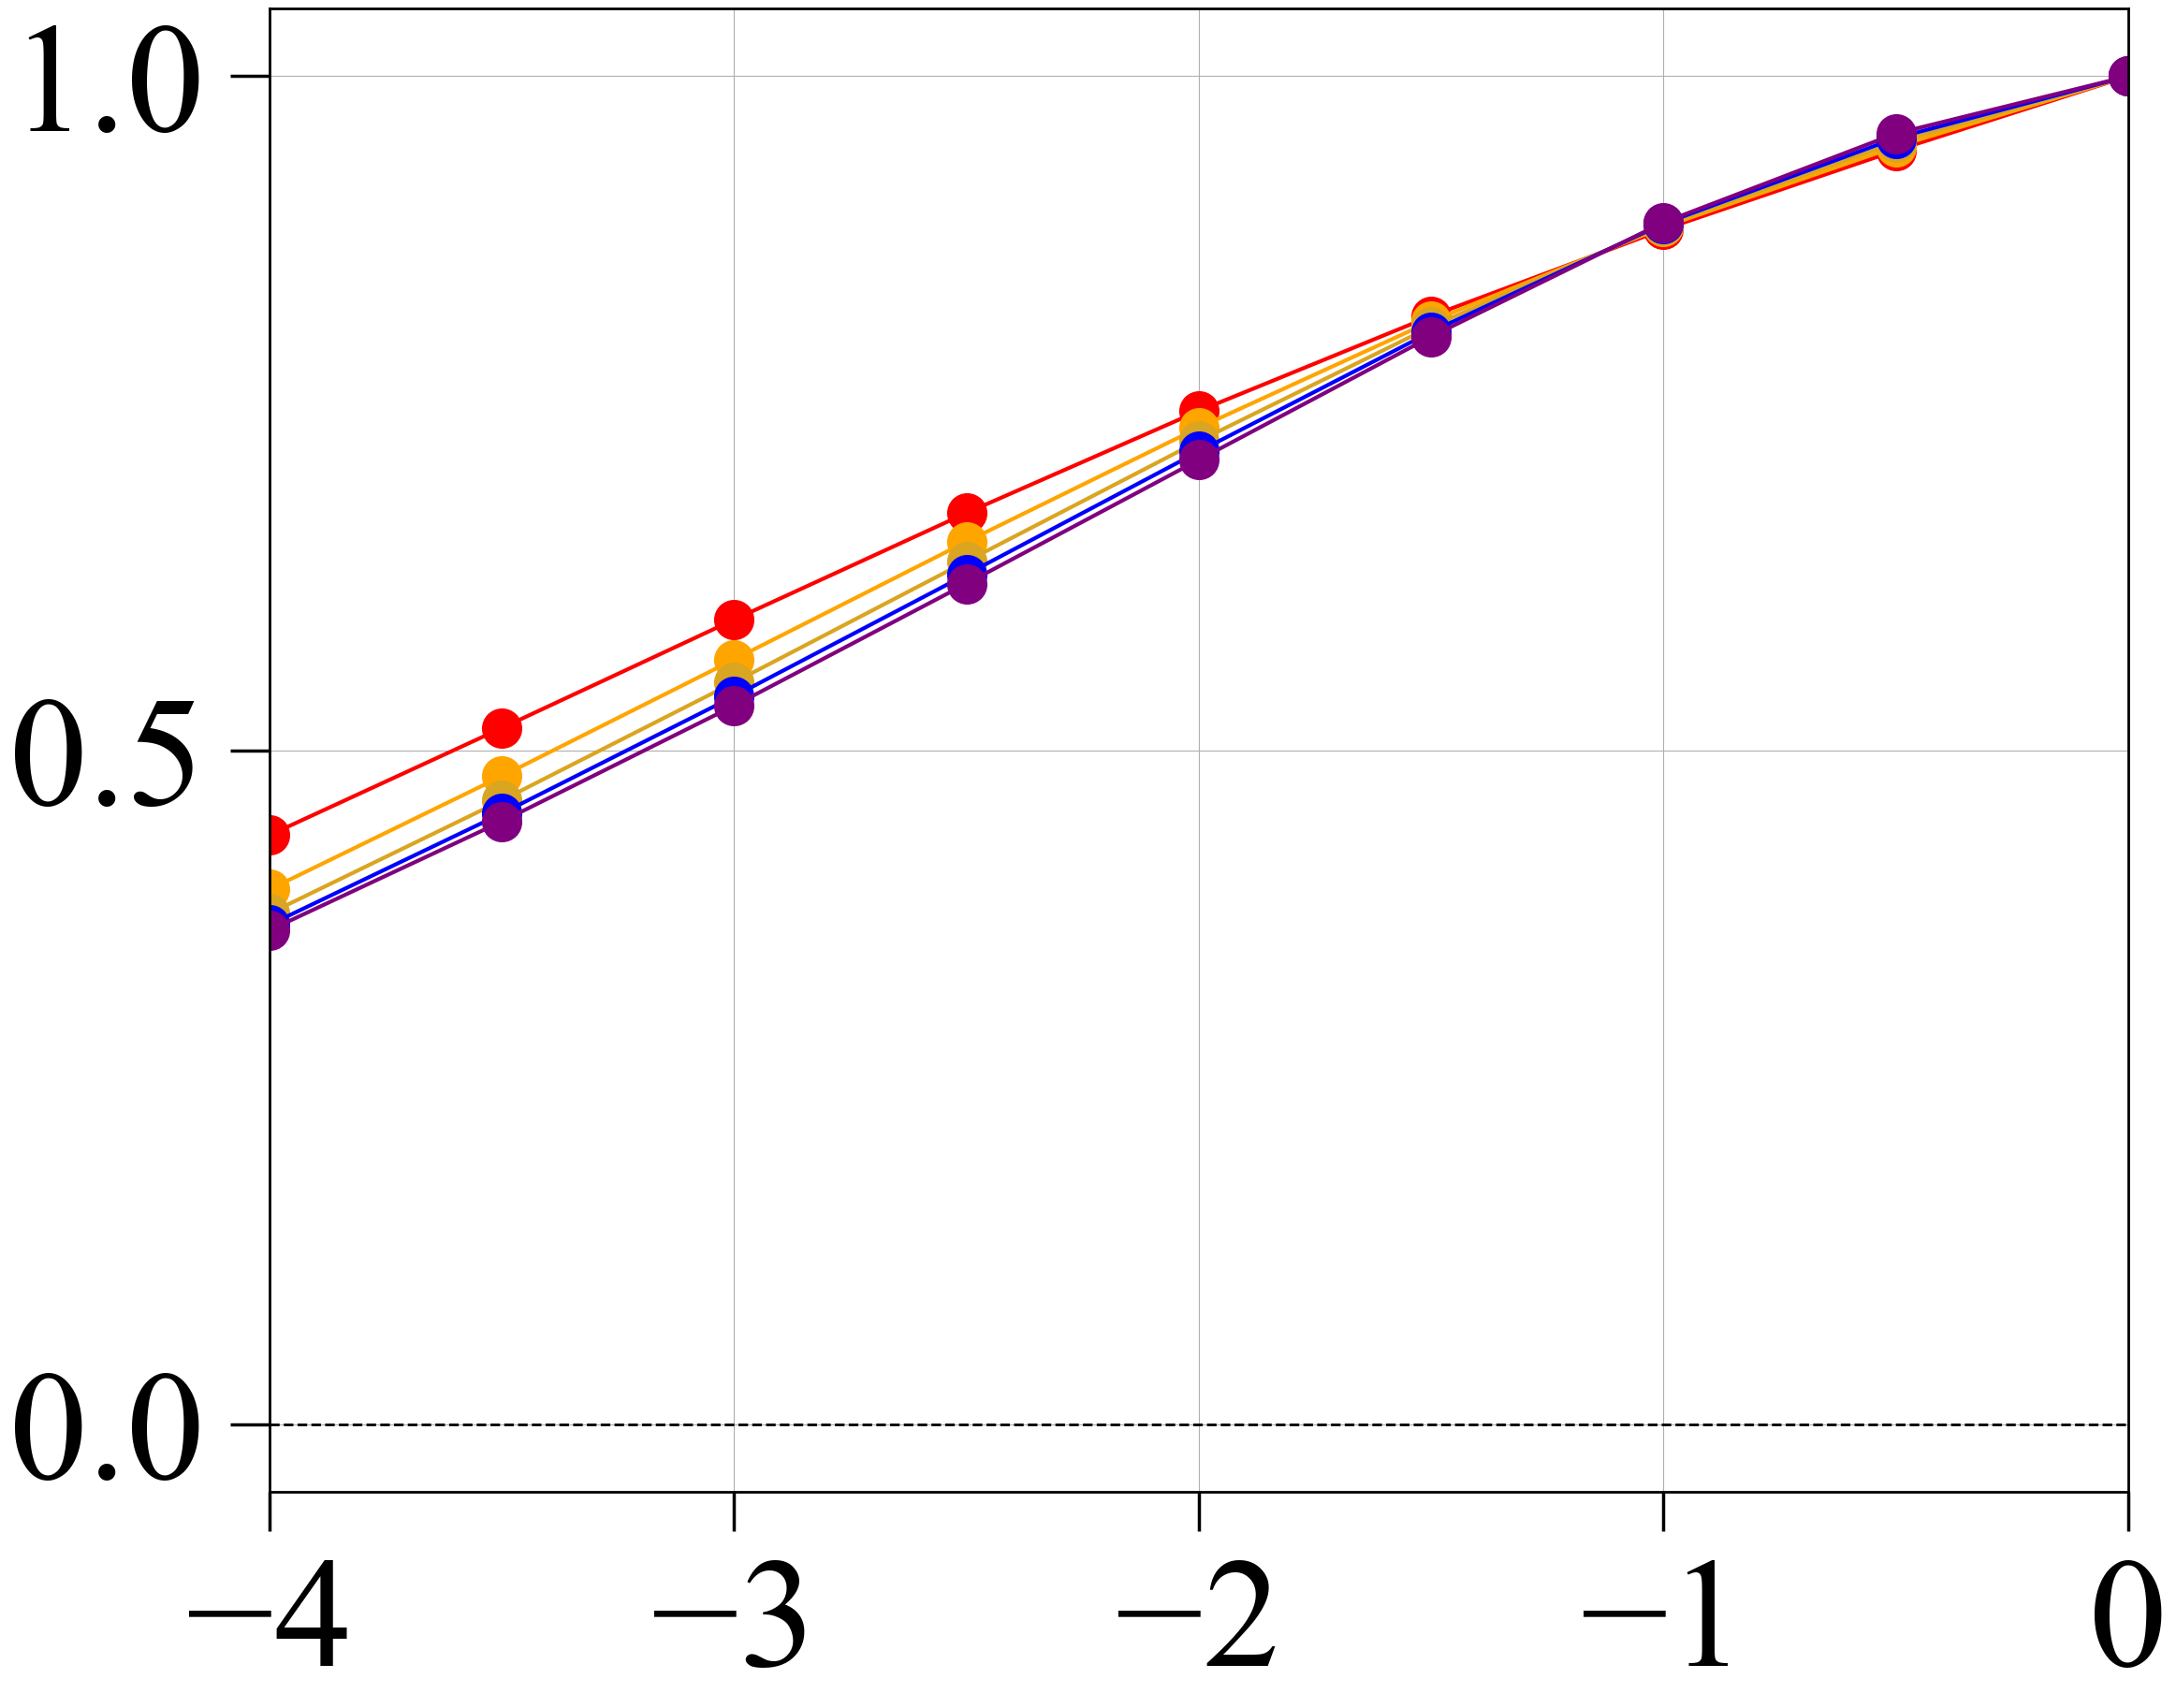

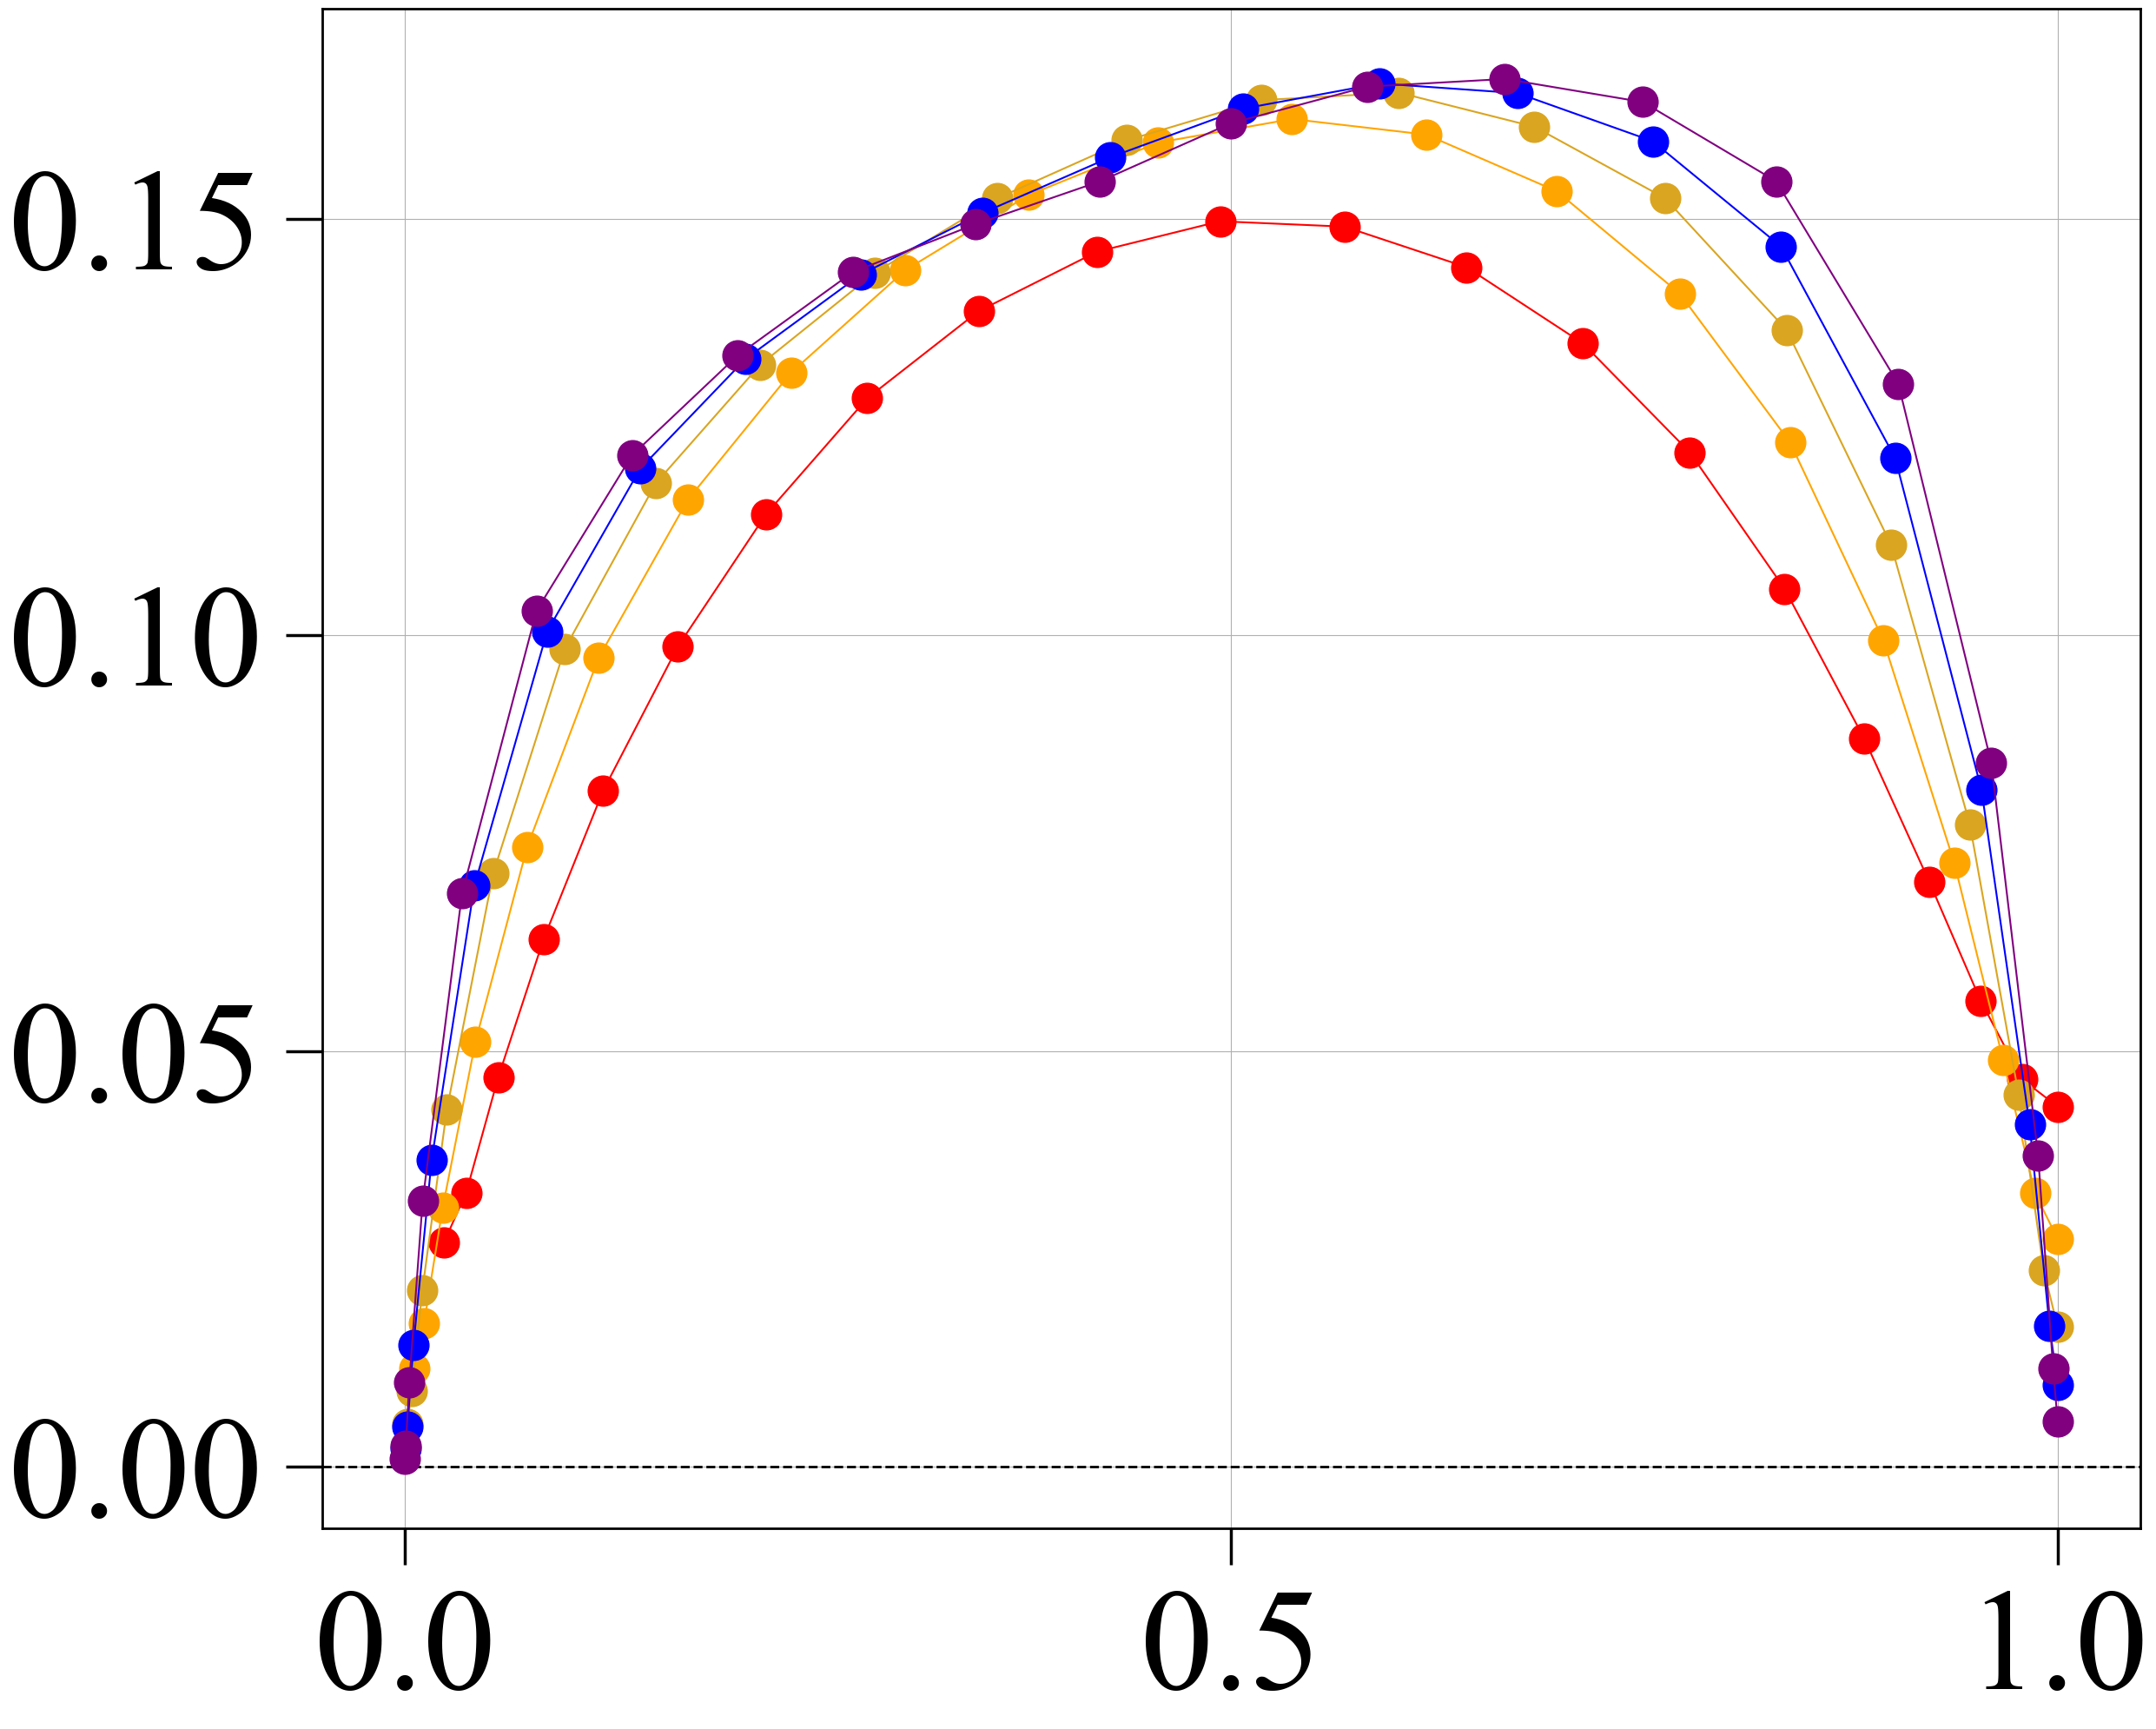

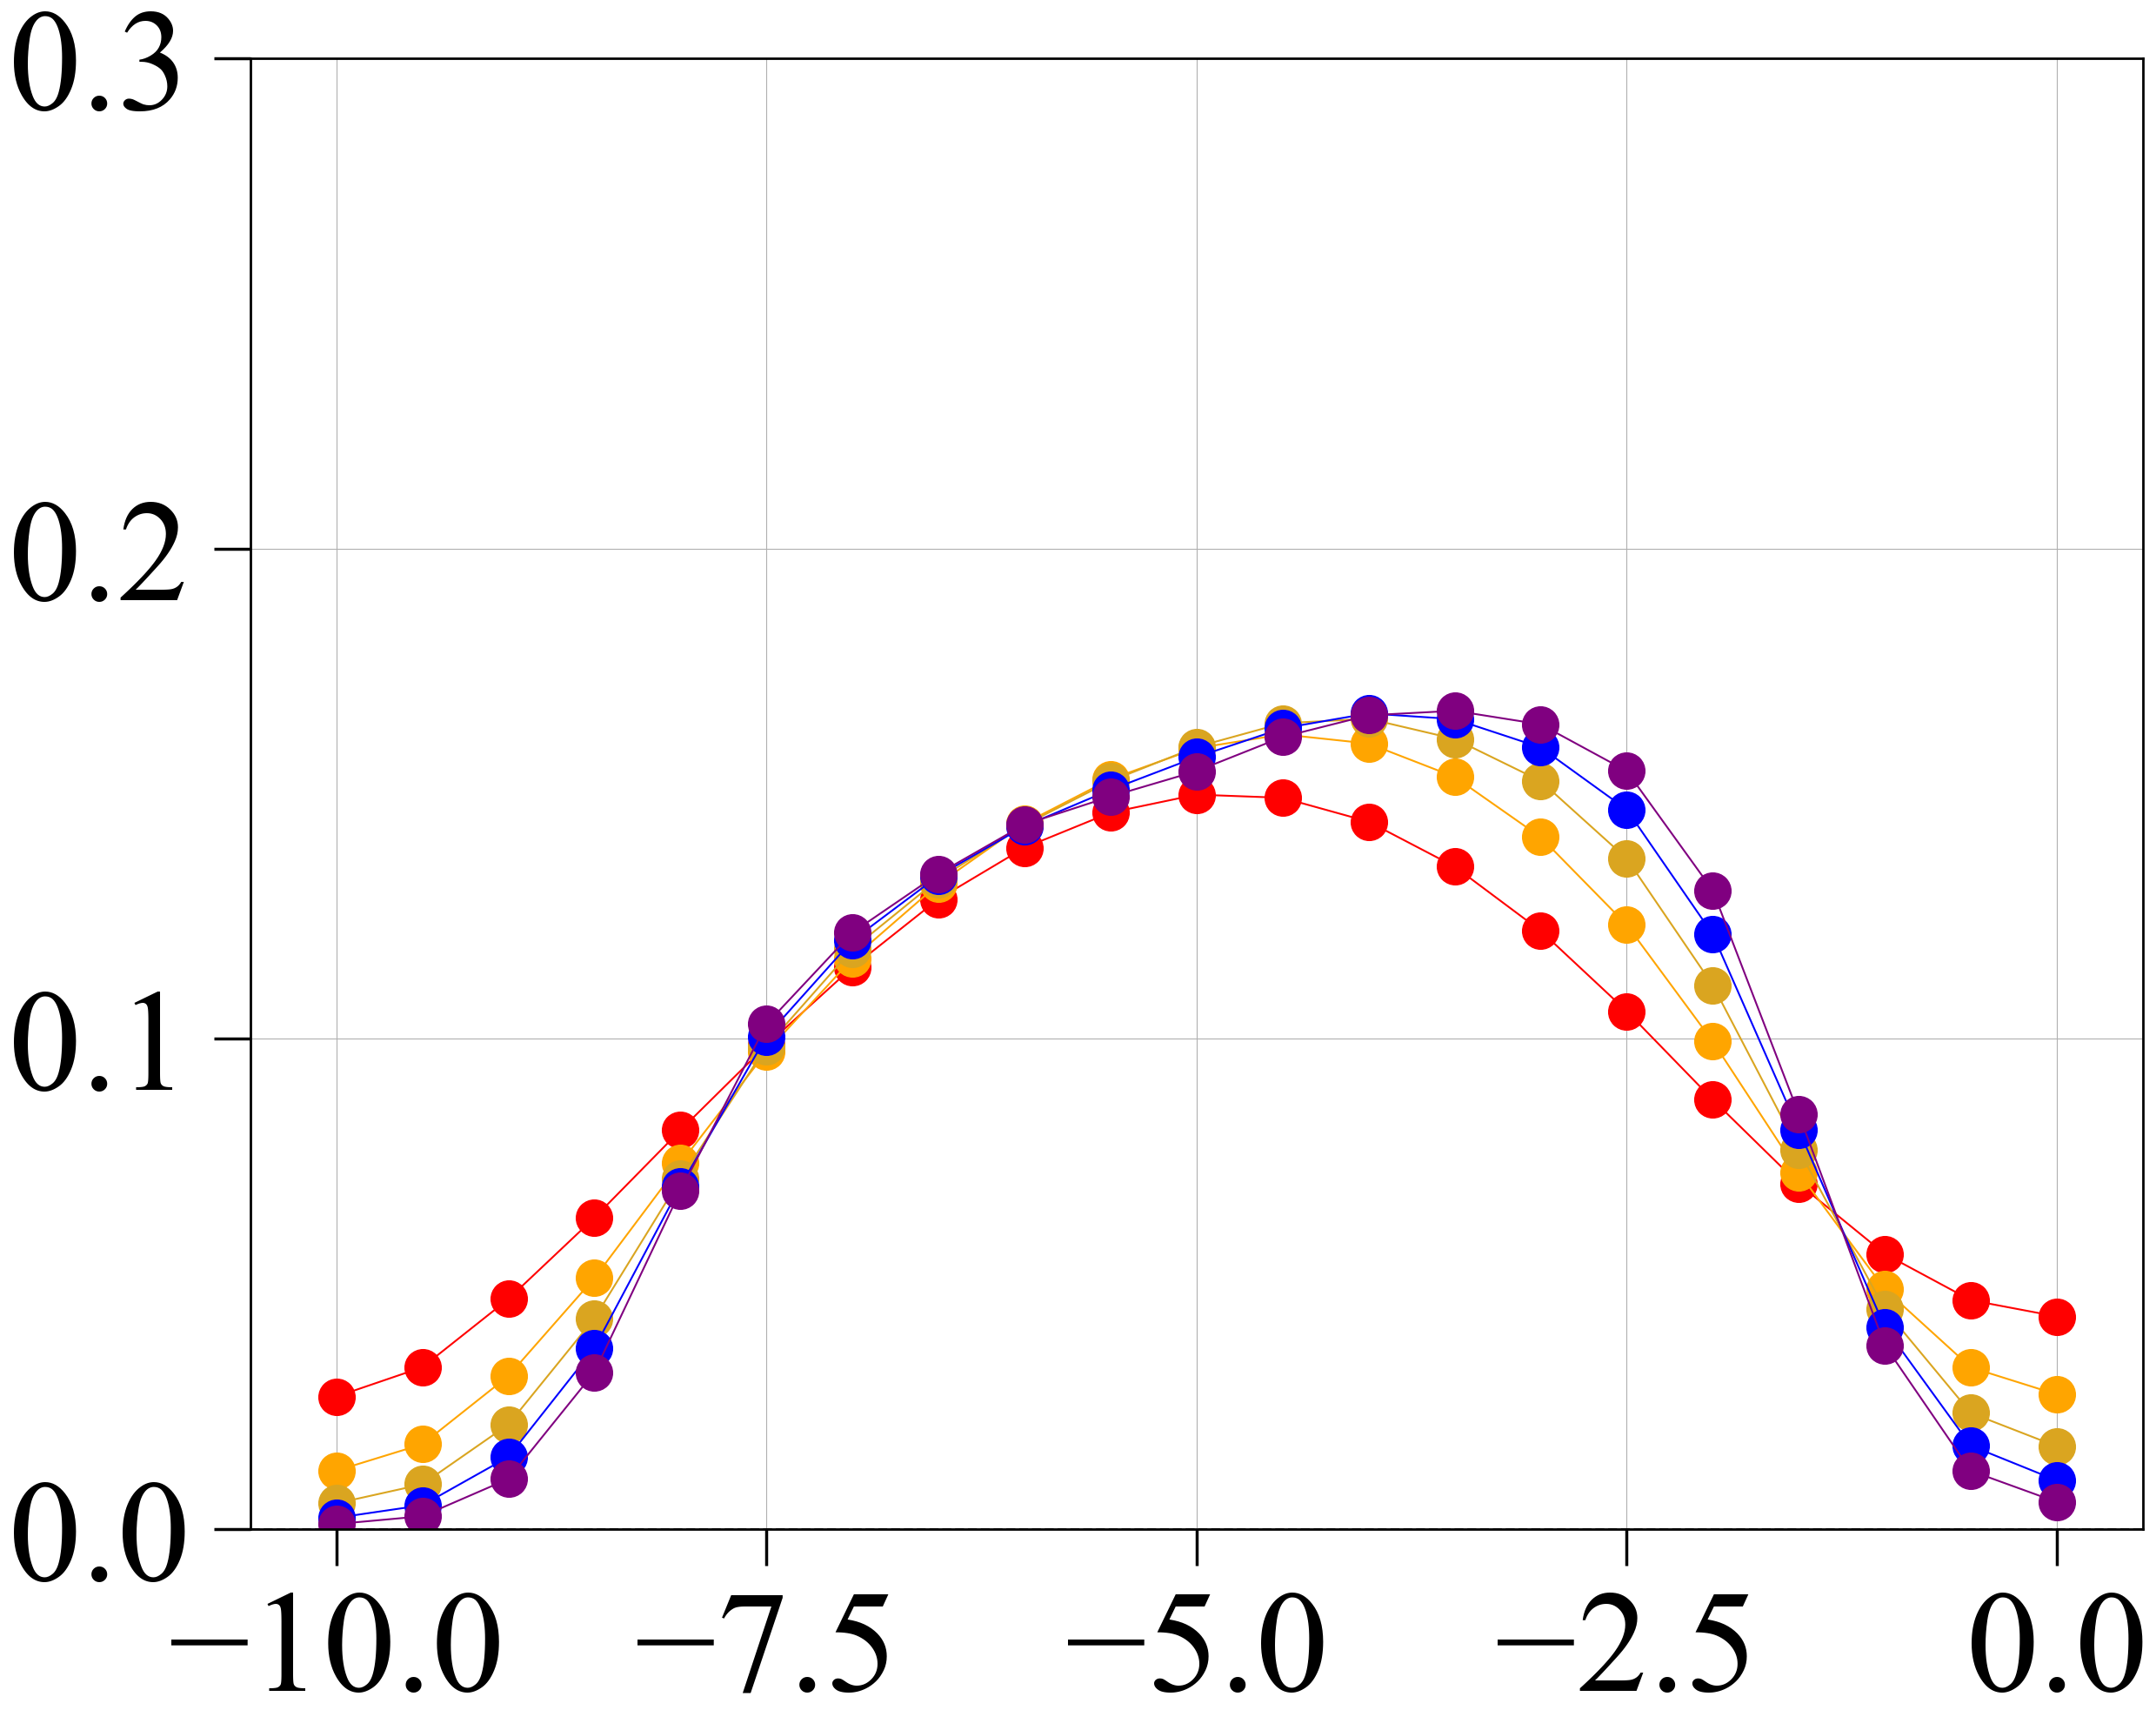

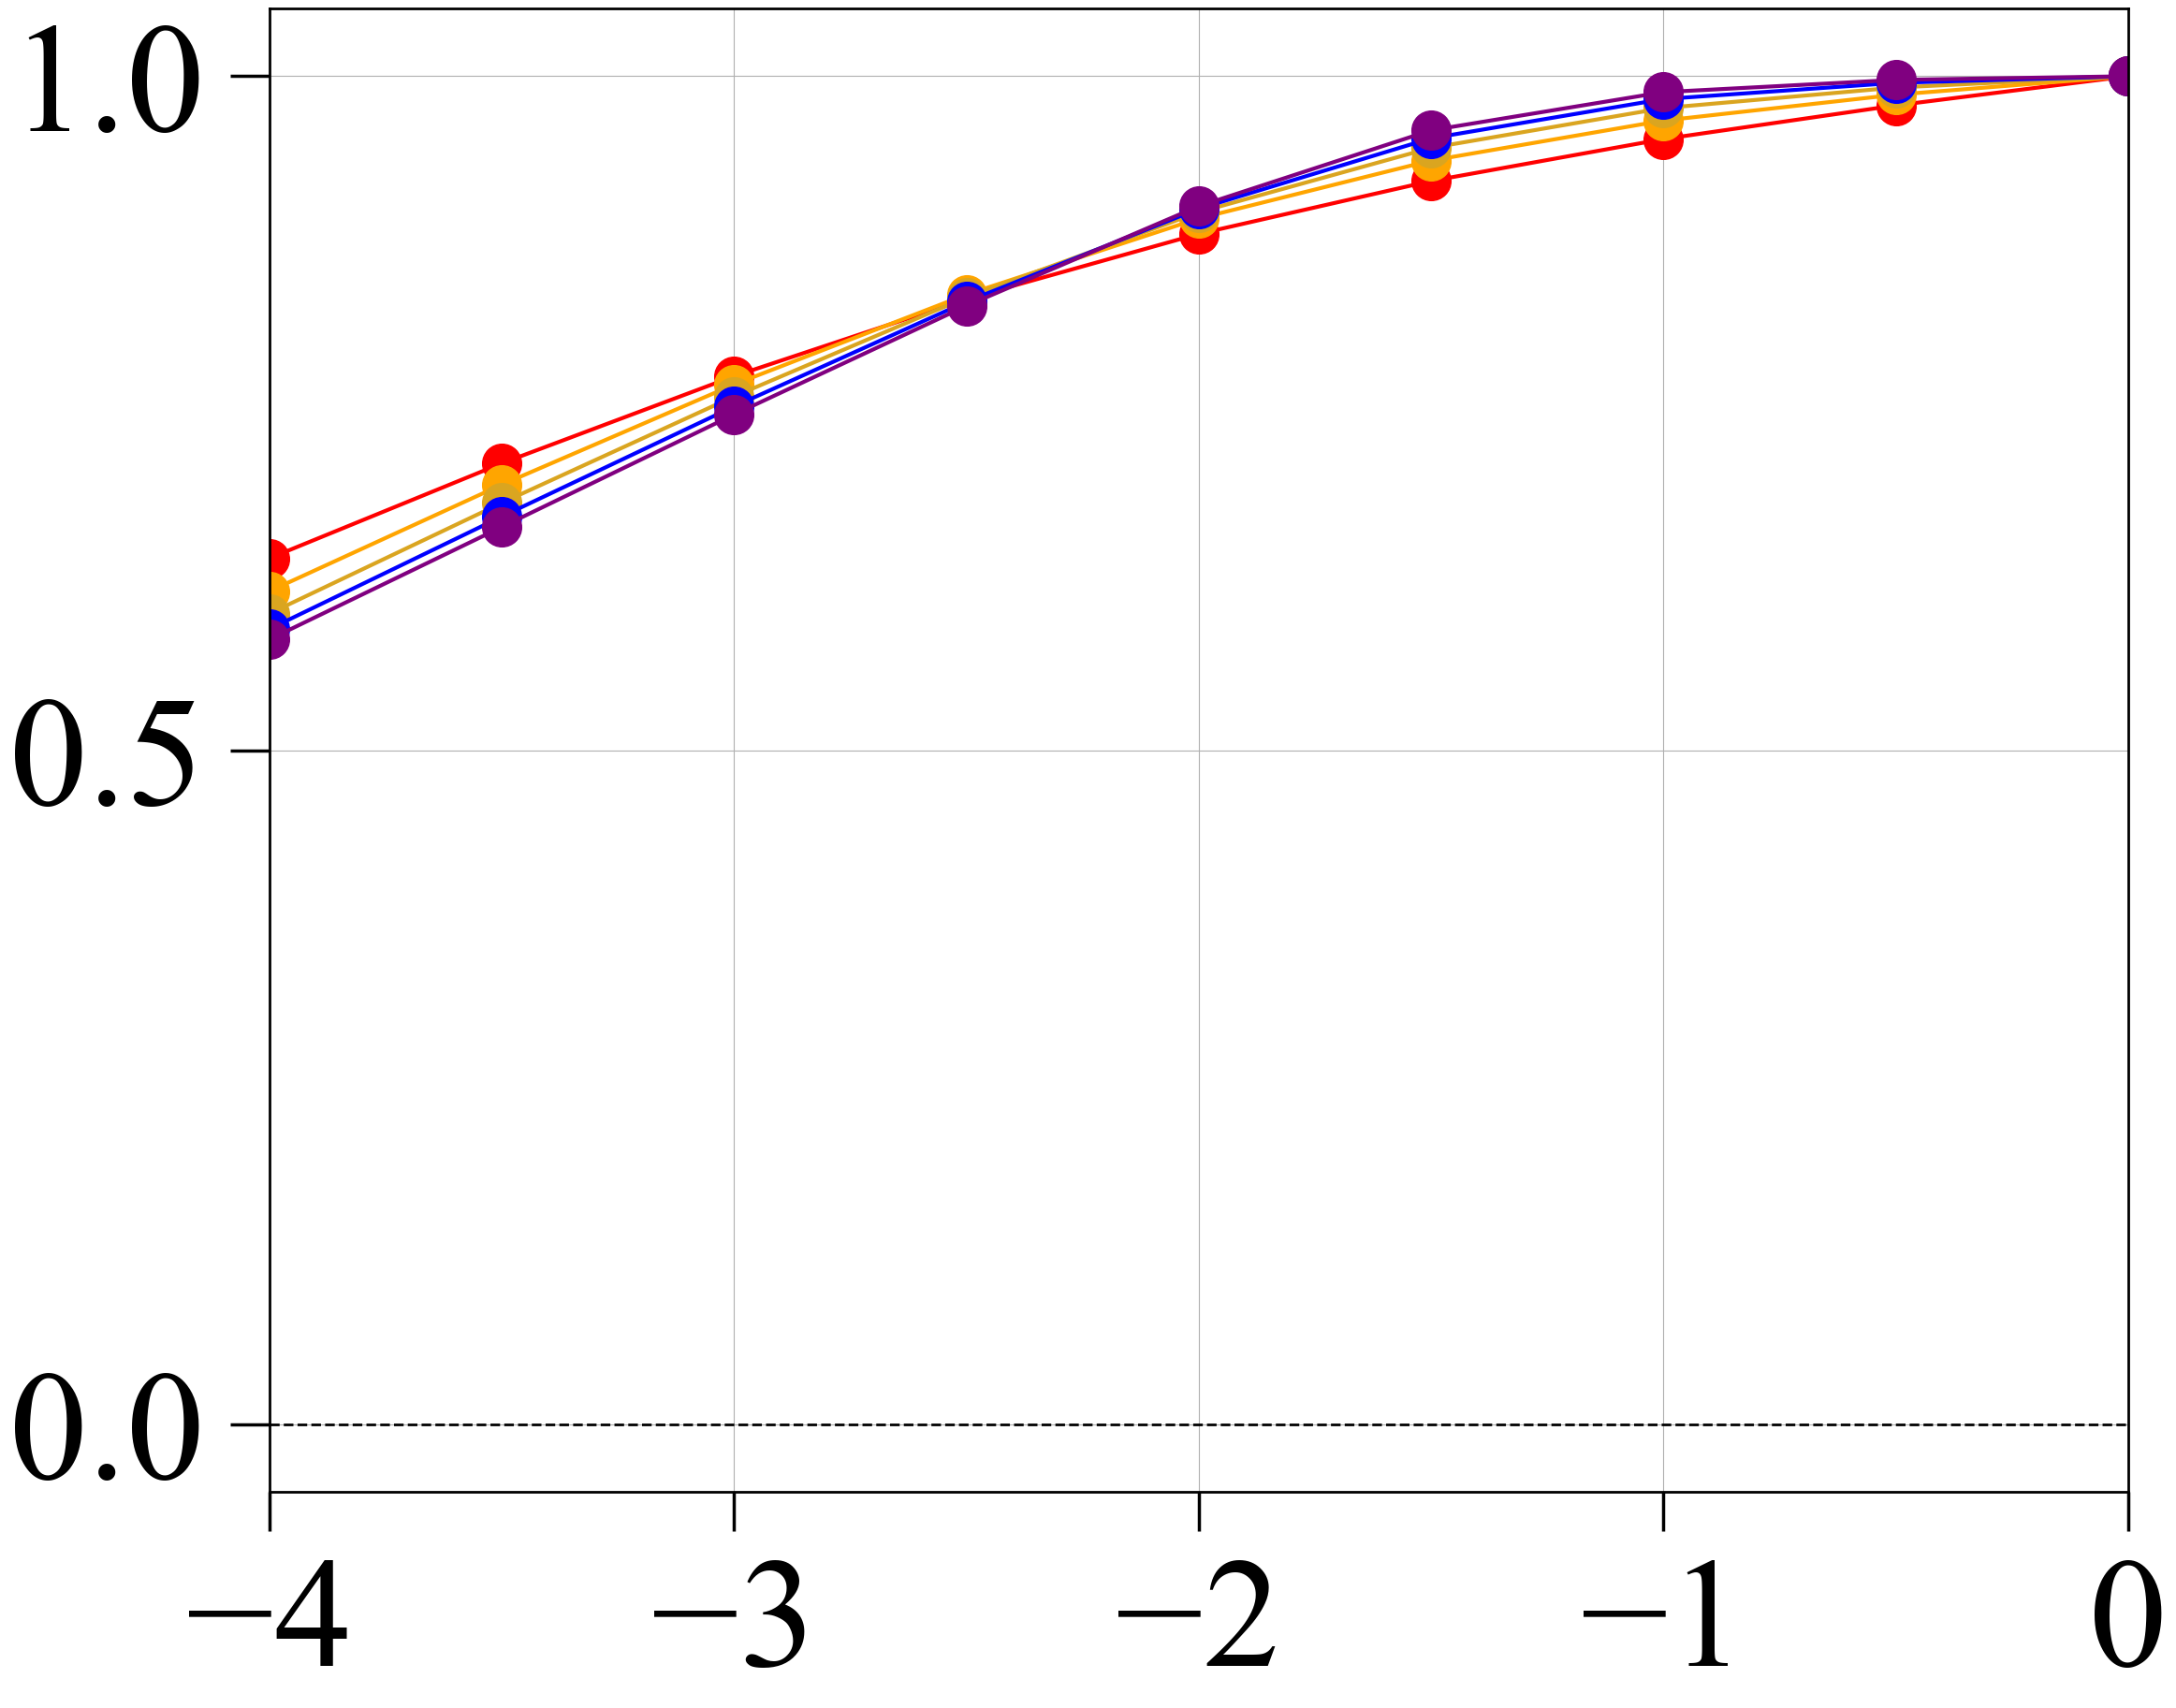

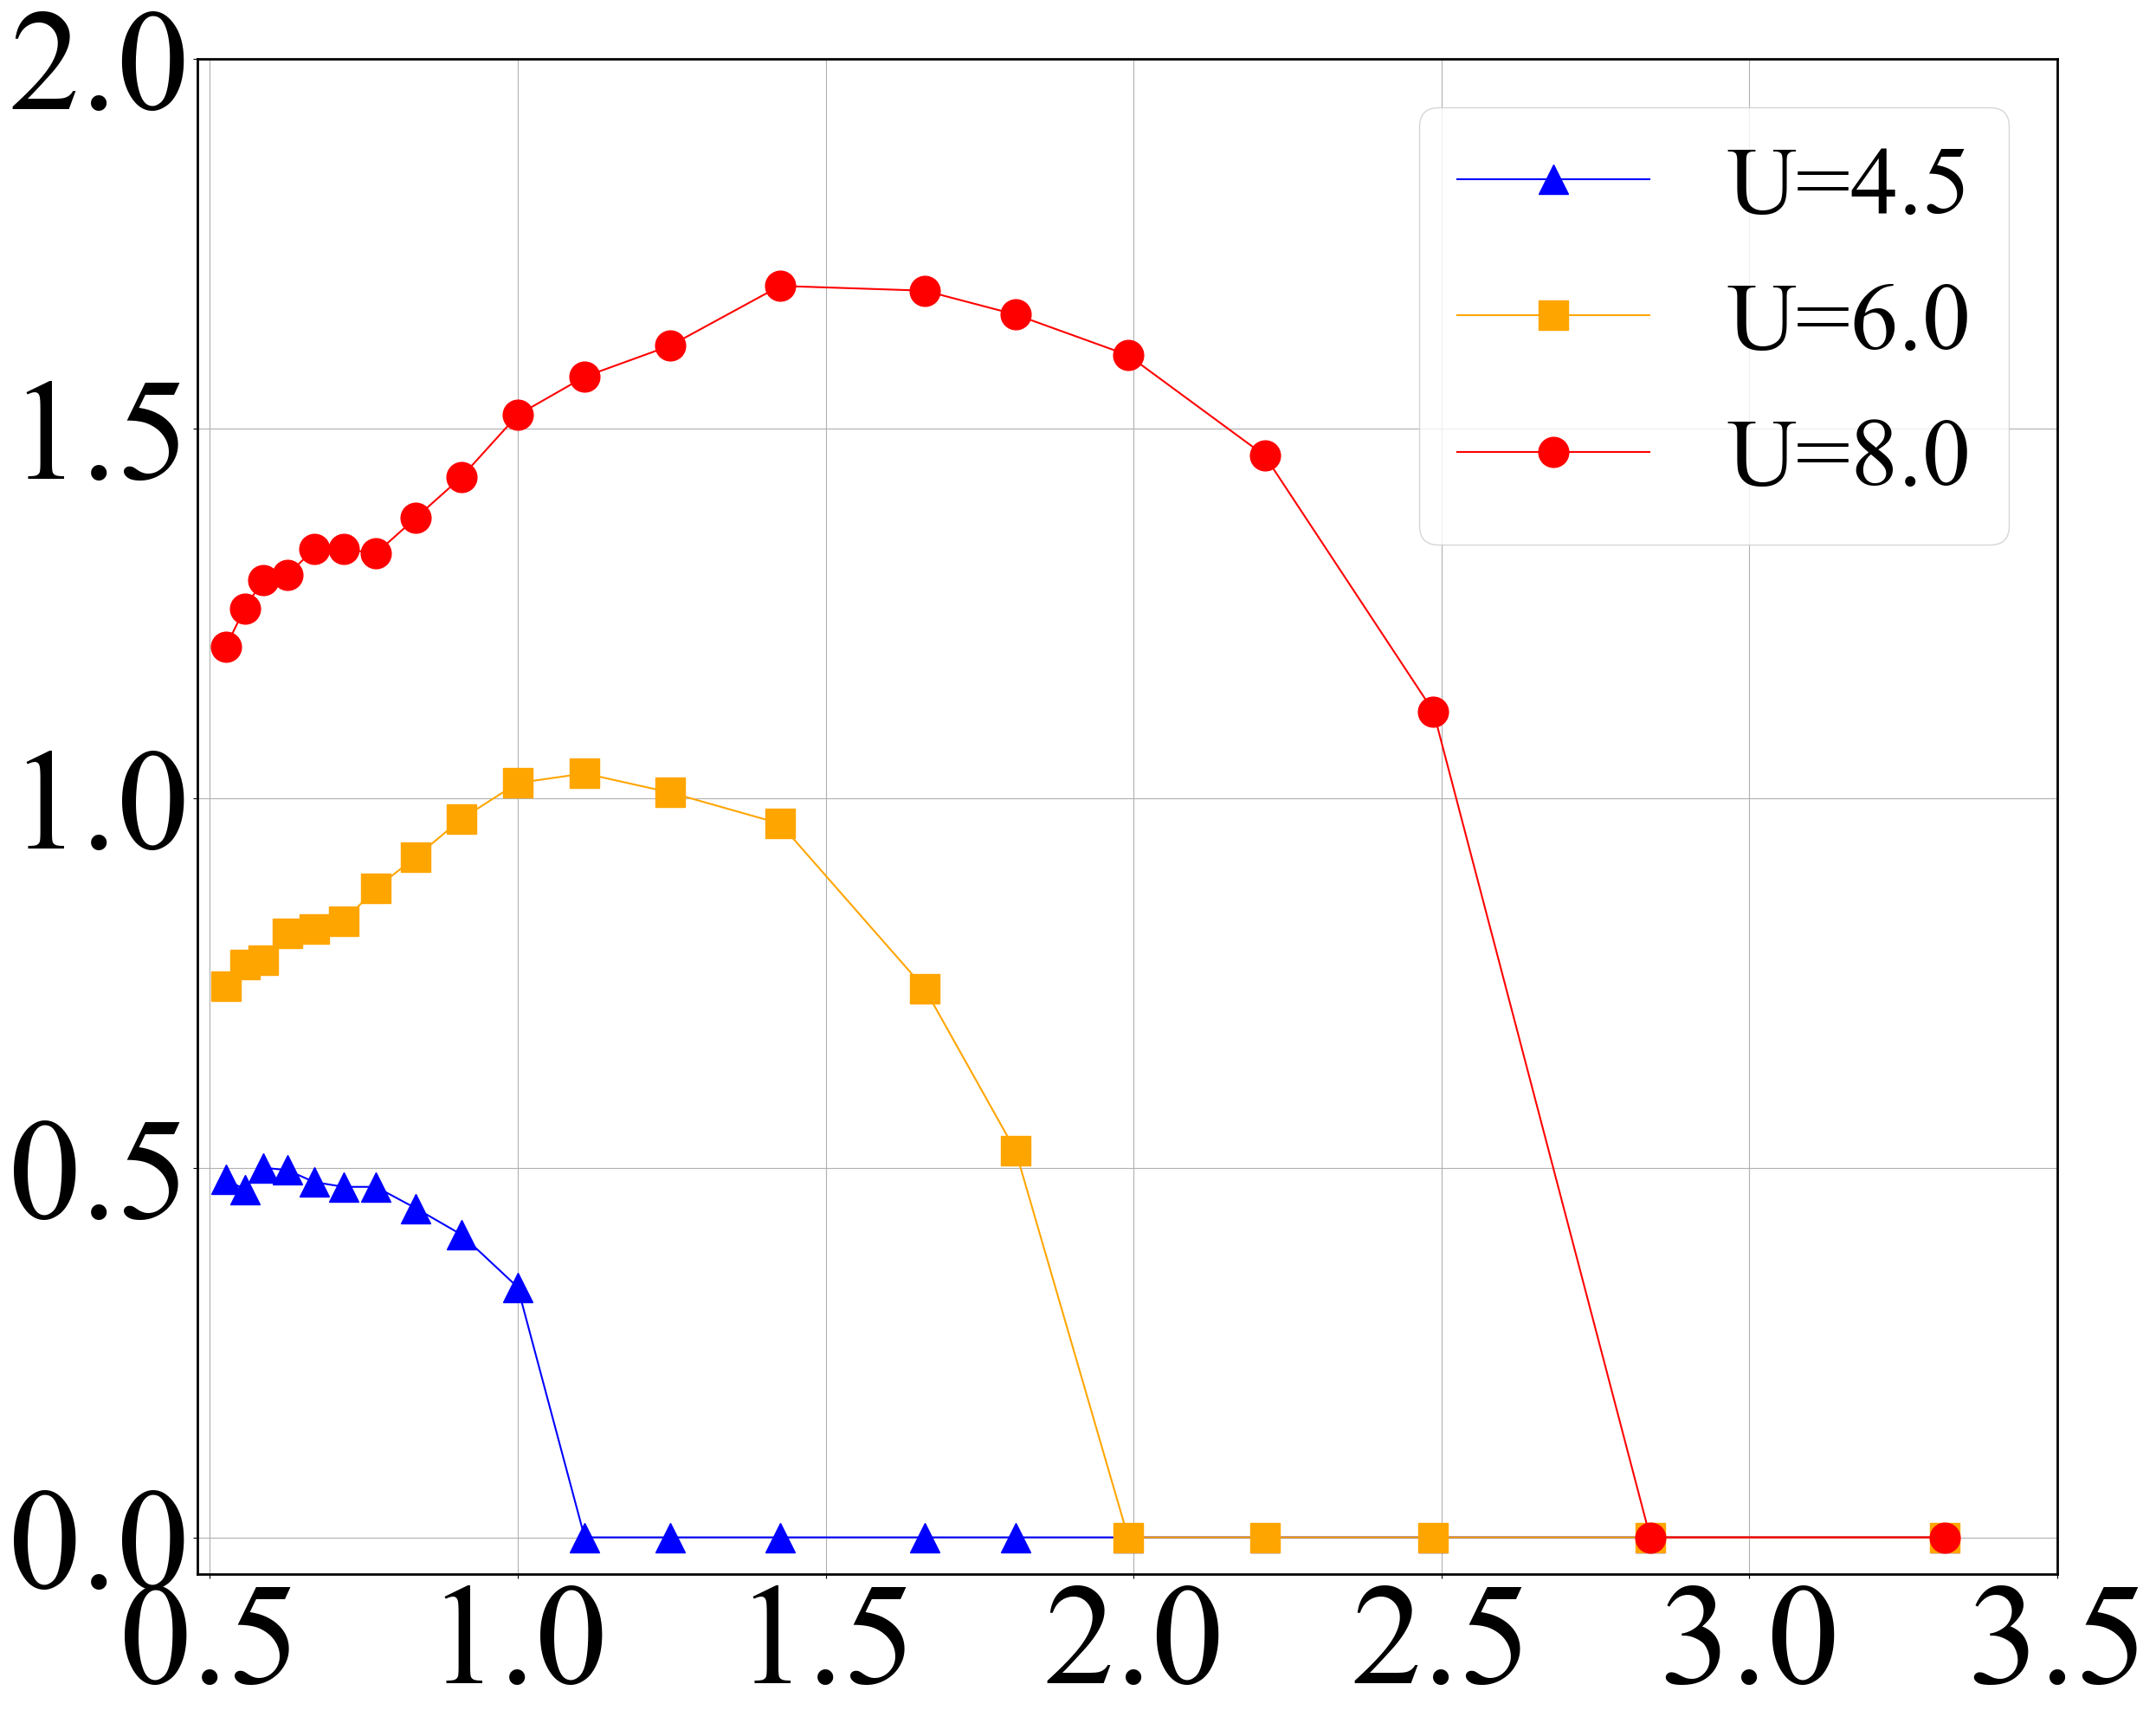

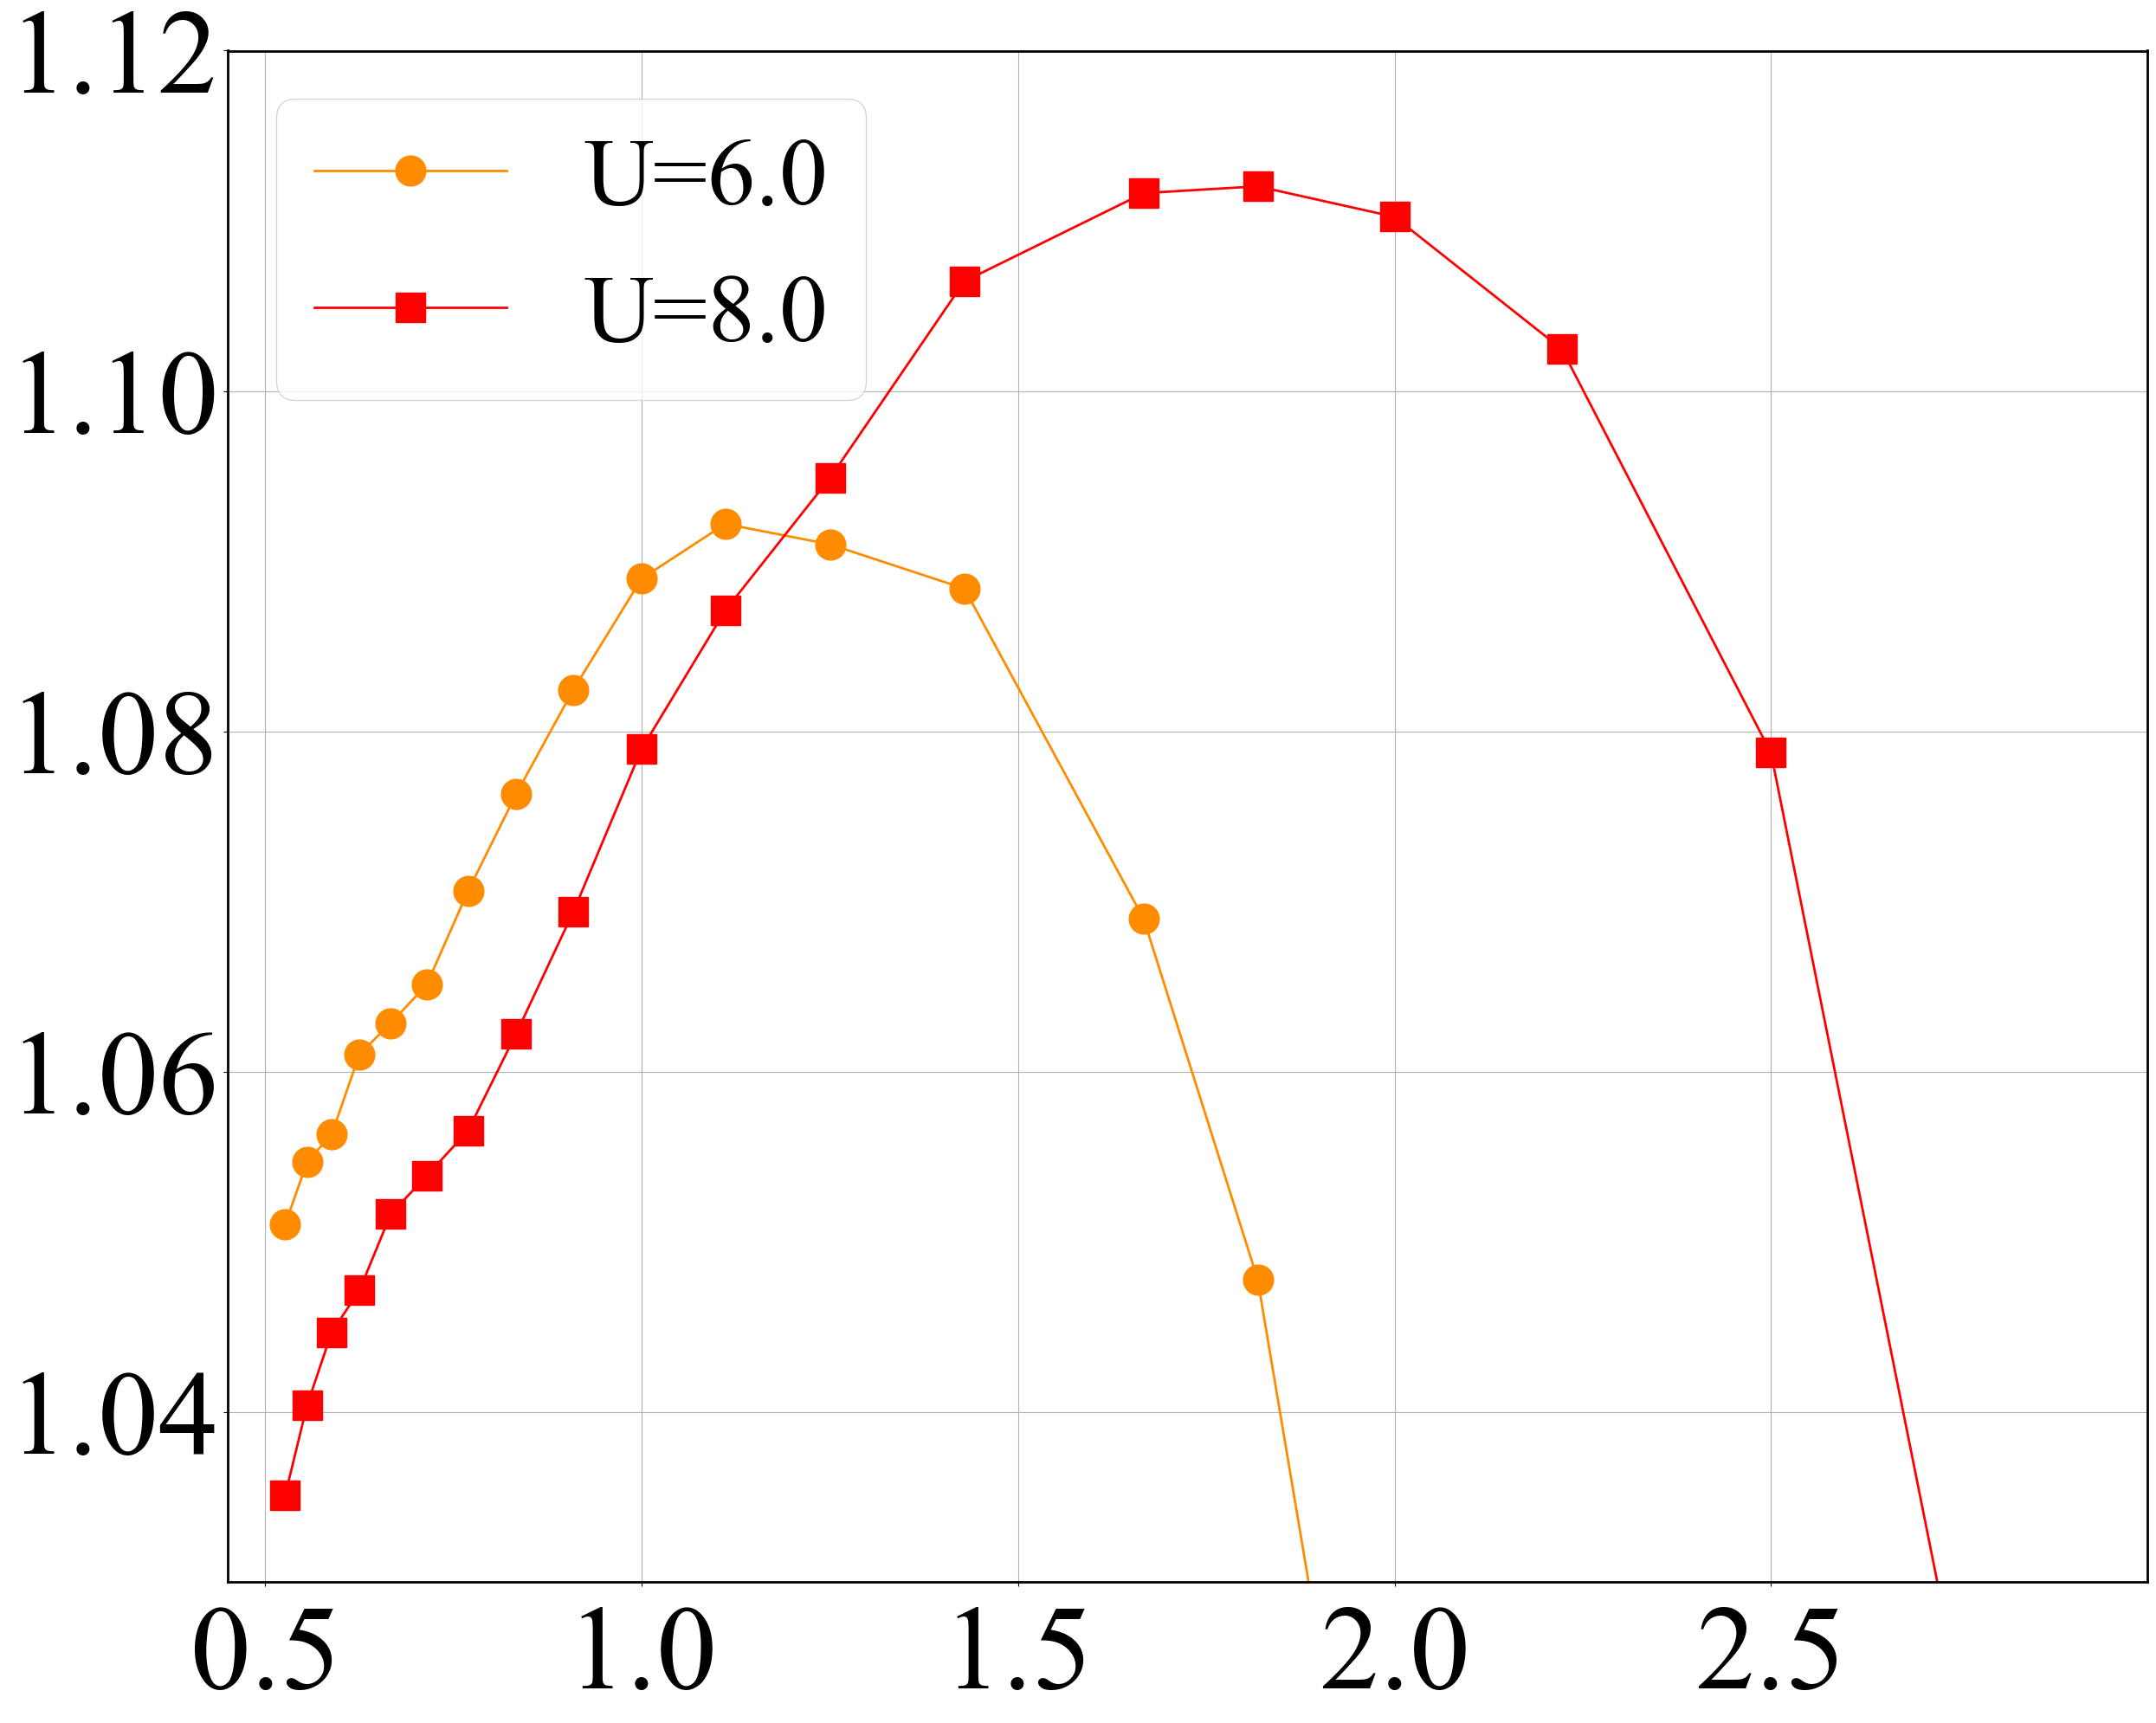

In [62]:
main()

### Plotting dk/dT vs density plots

In [248]:
N=10
U="6.00"
dtau="0.05"
#trot = ["12","16","20","24","28","32","36","40"]
trot = ["12","14","18","28","30","36"] #36","30","28","24","16","12"]
Text_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap"%N
Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N
if not os.path.exists(Graph_dir_kappa):
   os.makedirs(Graph_dir_kappa) 

plt.figure(figsize = (25,20))
plt.xticks([1.00,1.04,1.08,1.12],fontsize = 120)
plt.yticks([-0.1, -0.05, 0.00, 0.05, 0.1],fontsize = 120)
#color_1=iter(['blue','dodgerblue','darkgreen','olive','goldenrod','darkorange','peru','red'])
color_1=iter(['blue','dodgerblue','darkgreen','olive','darkorange','red'])
for k in range(len(trot)-1,-1,-1):
    c_1 = next(color_1)
    T_val = 1/(float(dtau)*float(trot[k]))
    filename_kappa = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_kappa,N,U,dtau,N,U,dtau,trot[k])
    mu_val,num_den,kap,kap_std = np.loadtxt(filename_kappa,unpack = 'True',usecols = [0,1,3,4])        
    plt.errorbar(num_den,kap,yerr=kap_std,c=c_1,marker = "o",markersize = 25,linewidth=2,elinewidth=3,capsize=5,label = "T=%s"%(str(round(T_val,3))))
plt.grid("True",which='both')
plt.legend(loc='best',ncol=2,fontsize=70)
plt.xlim(1.0,1.12)
plt.axhline(y = 0,color = 'black',linewidth = 2,linestyle = 'dashed')
plt.tight_layout()
plt.savefig("%s/dkappa_dT_vs_density_N_%s_U_%s.png"%(Graph_dir_kappa,N,U))
plt.close('all')

### Plotting n_c vs T for N = 10

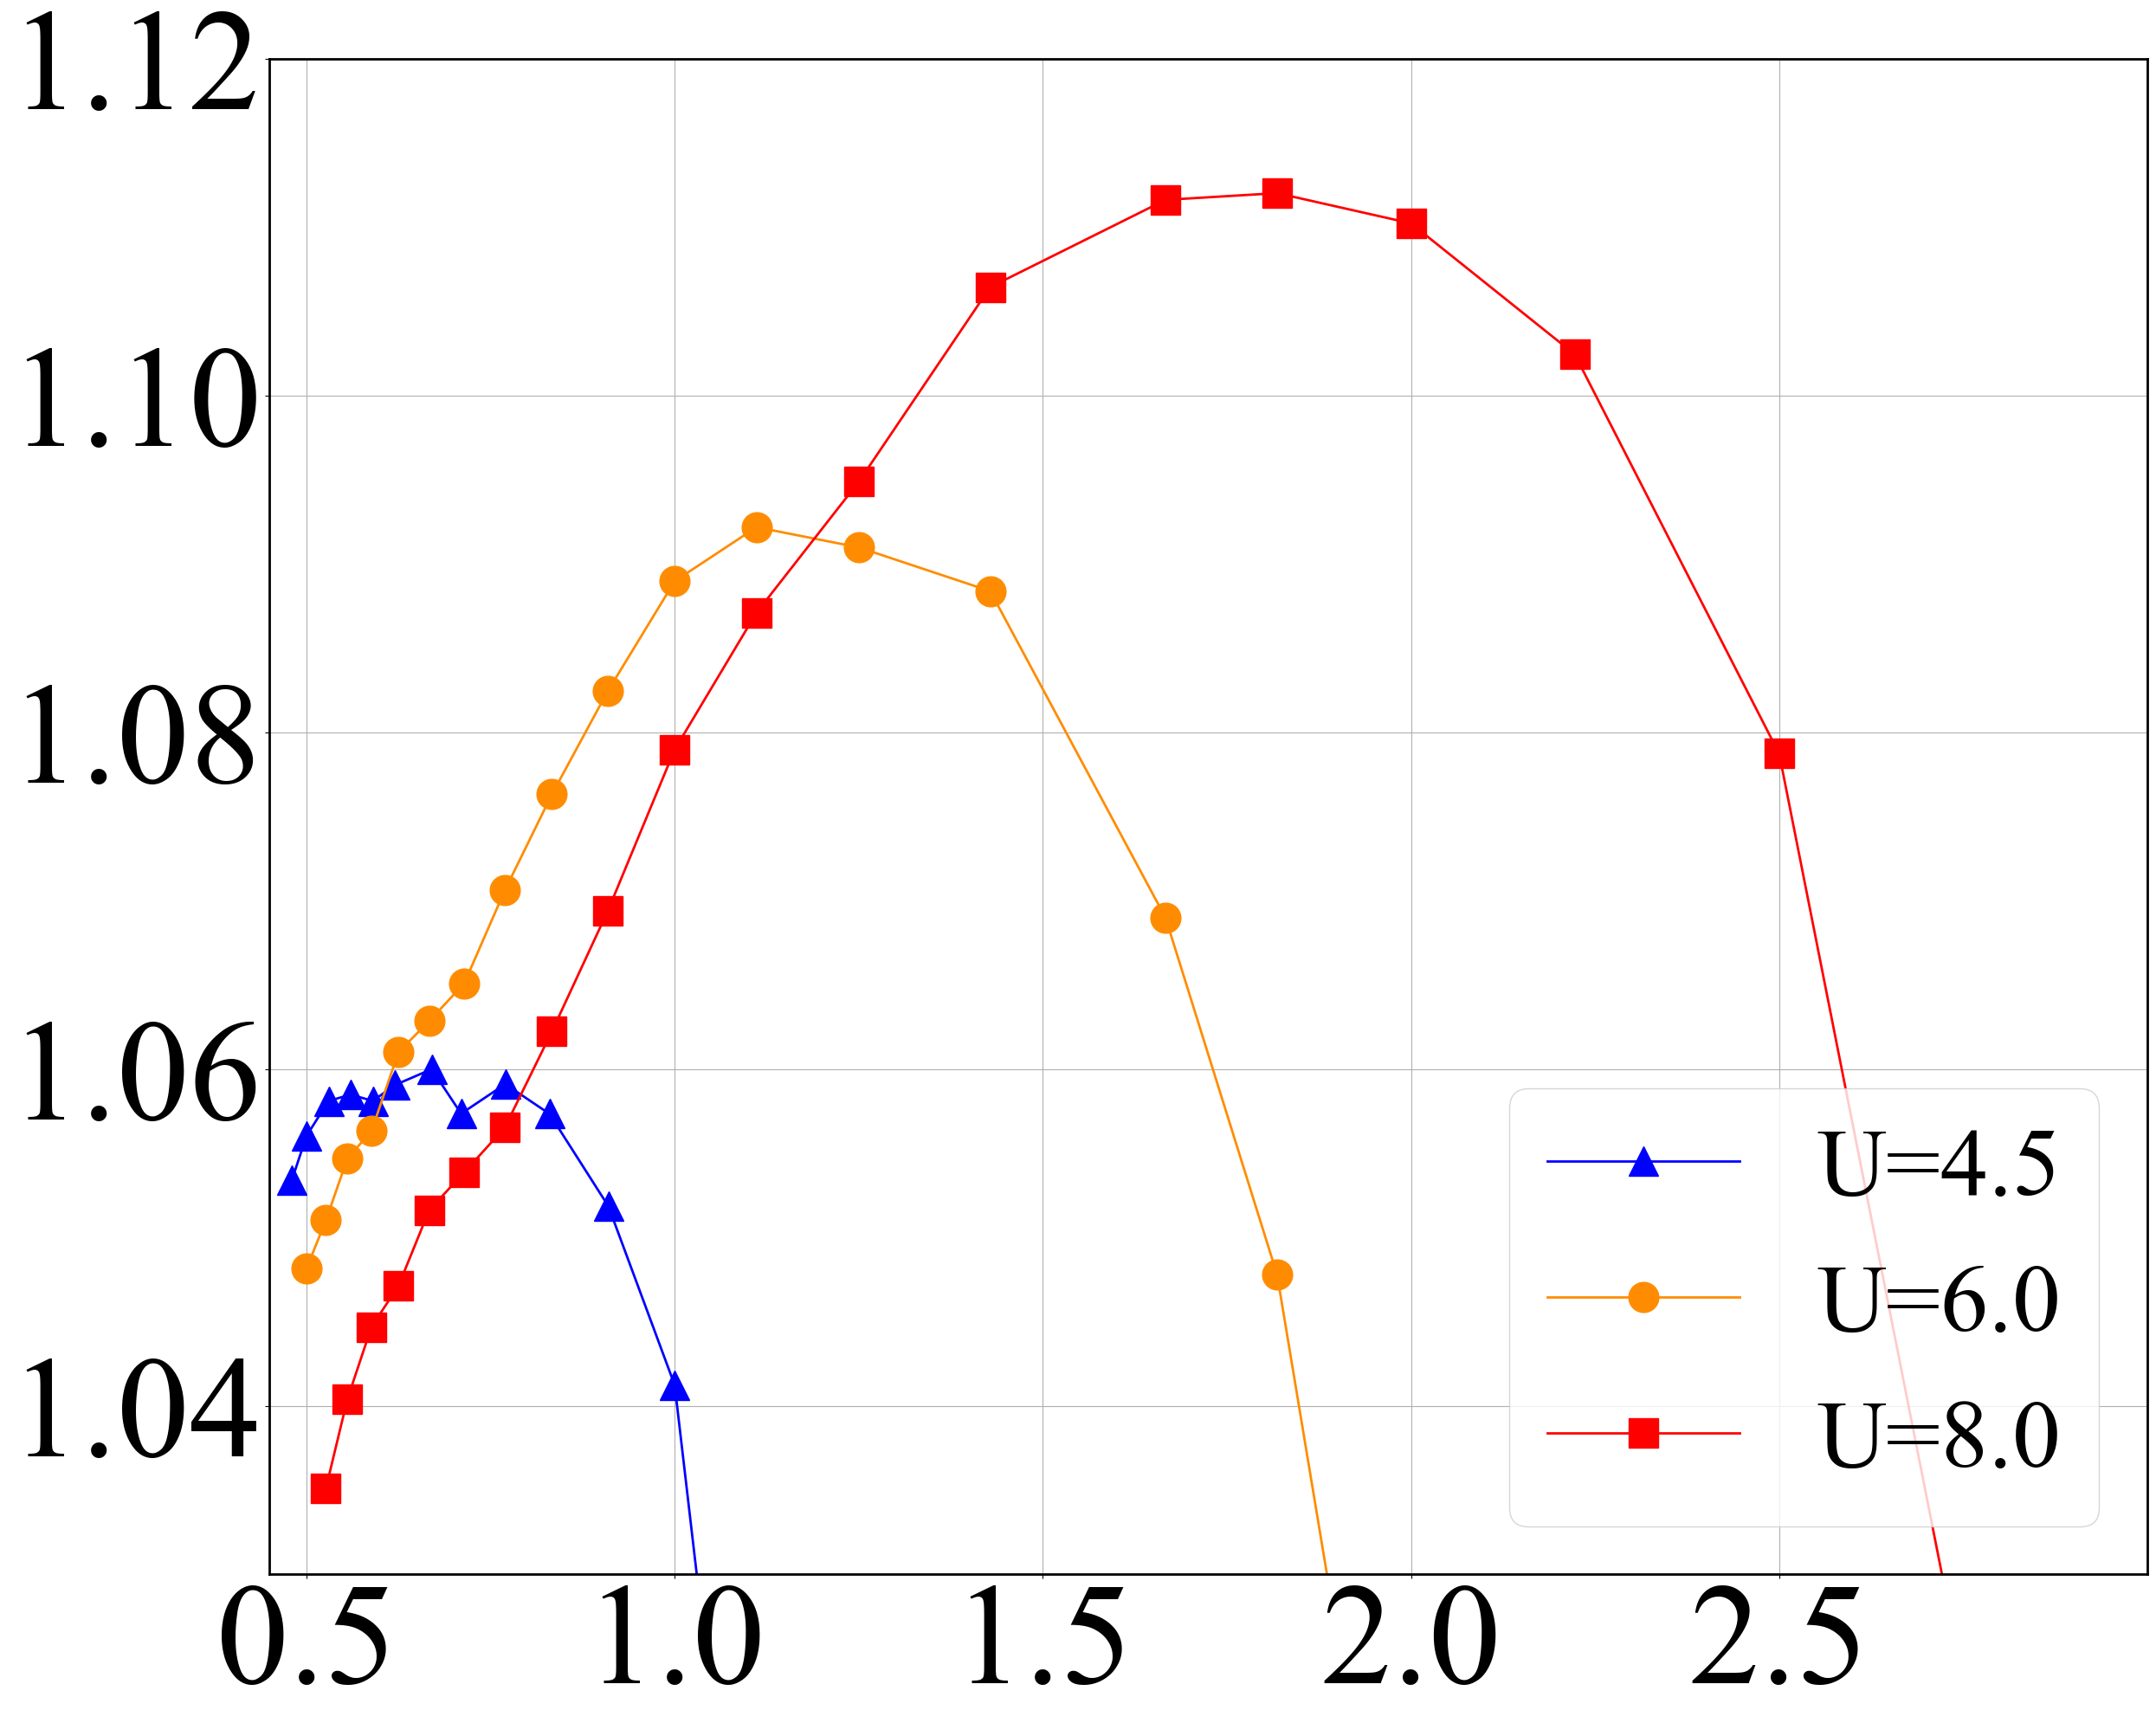

### Plotting nc vs T for N = 16

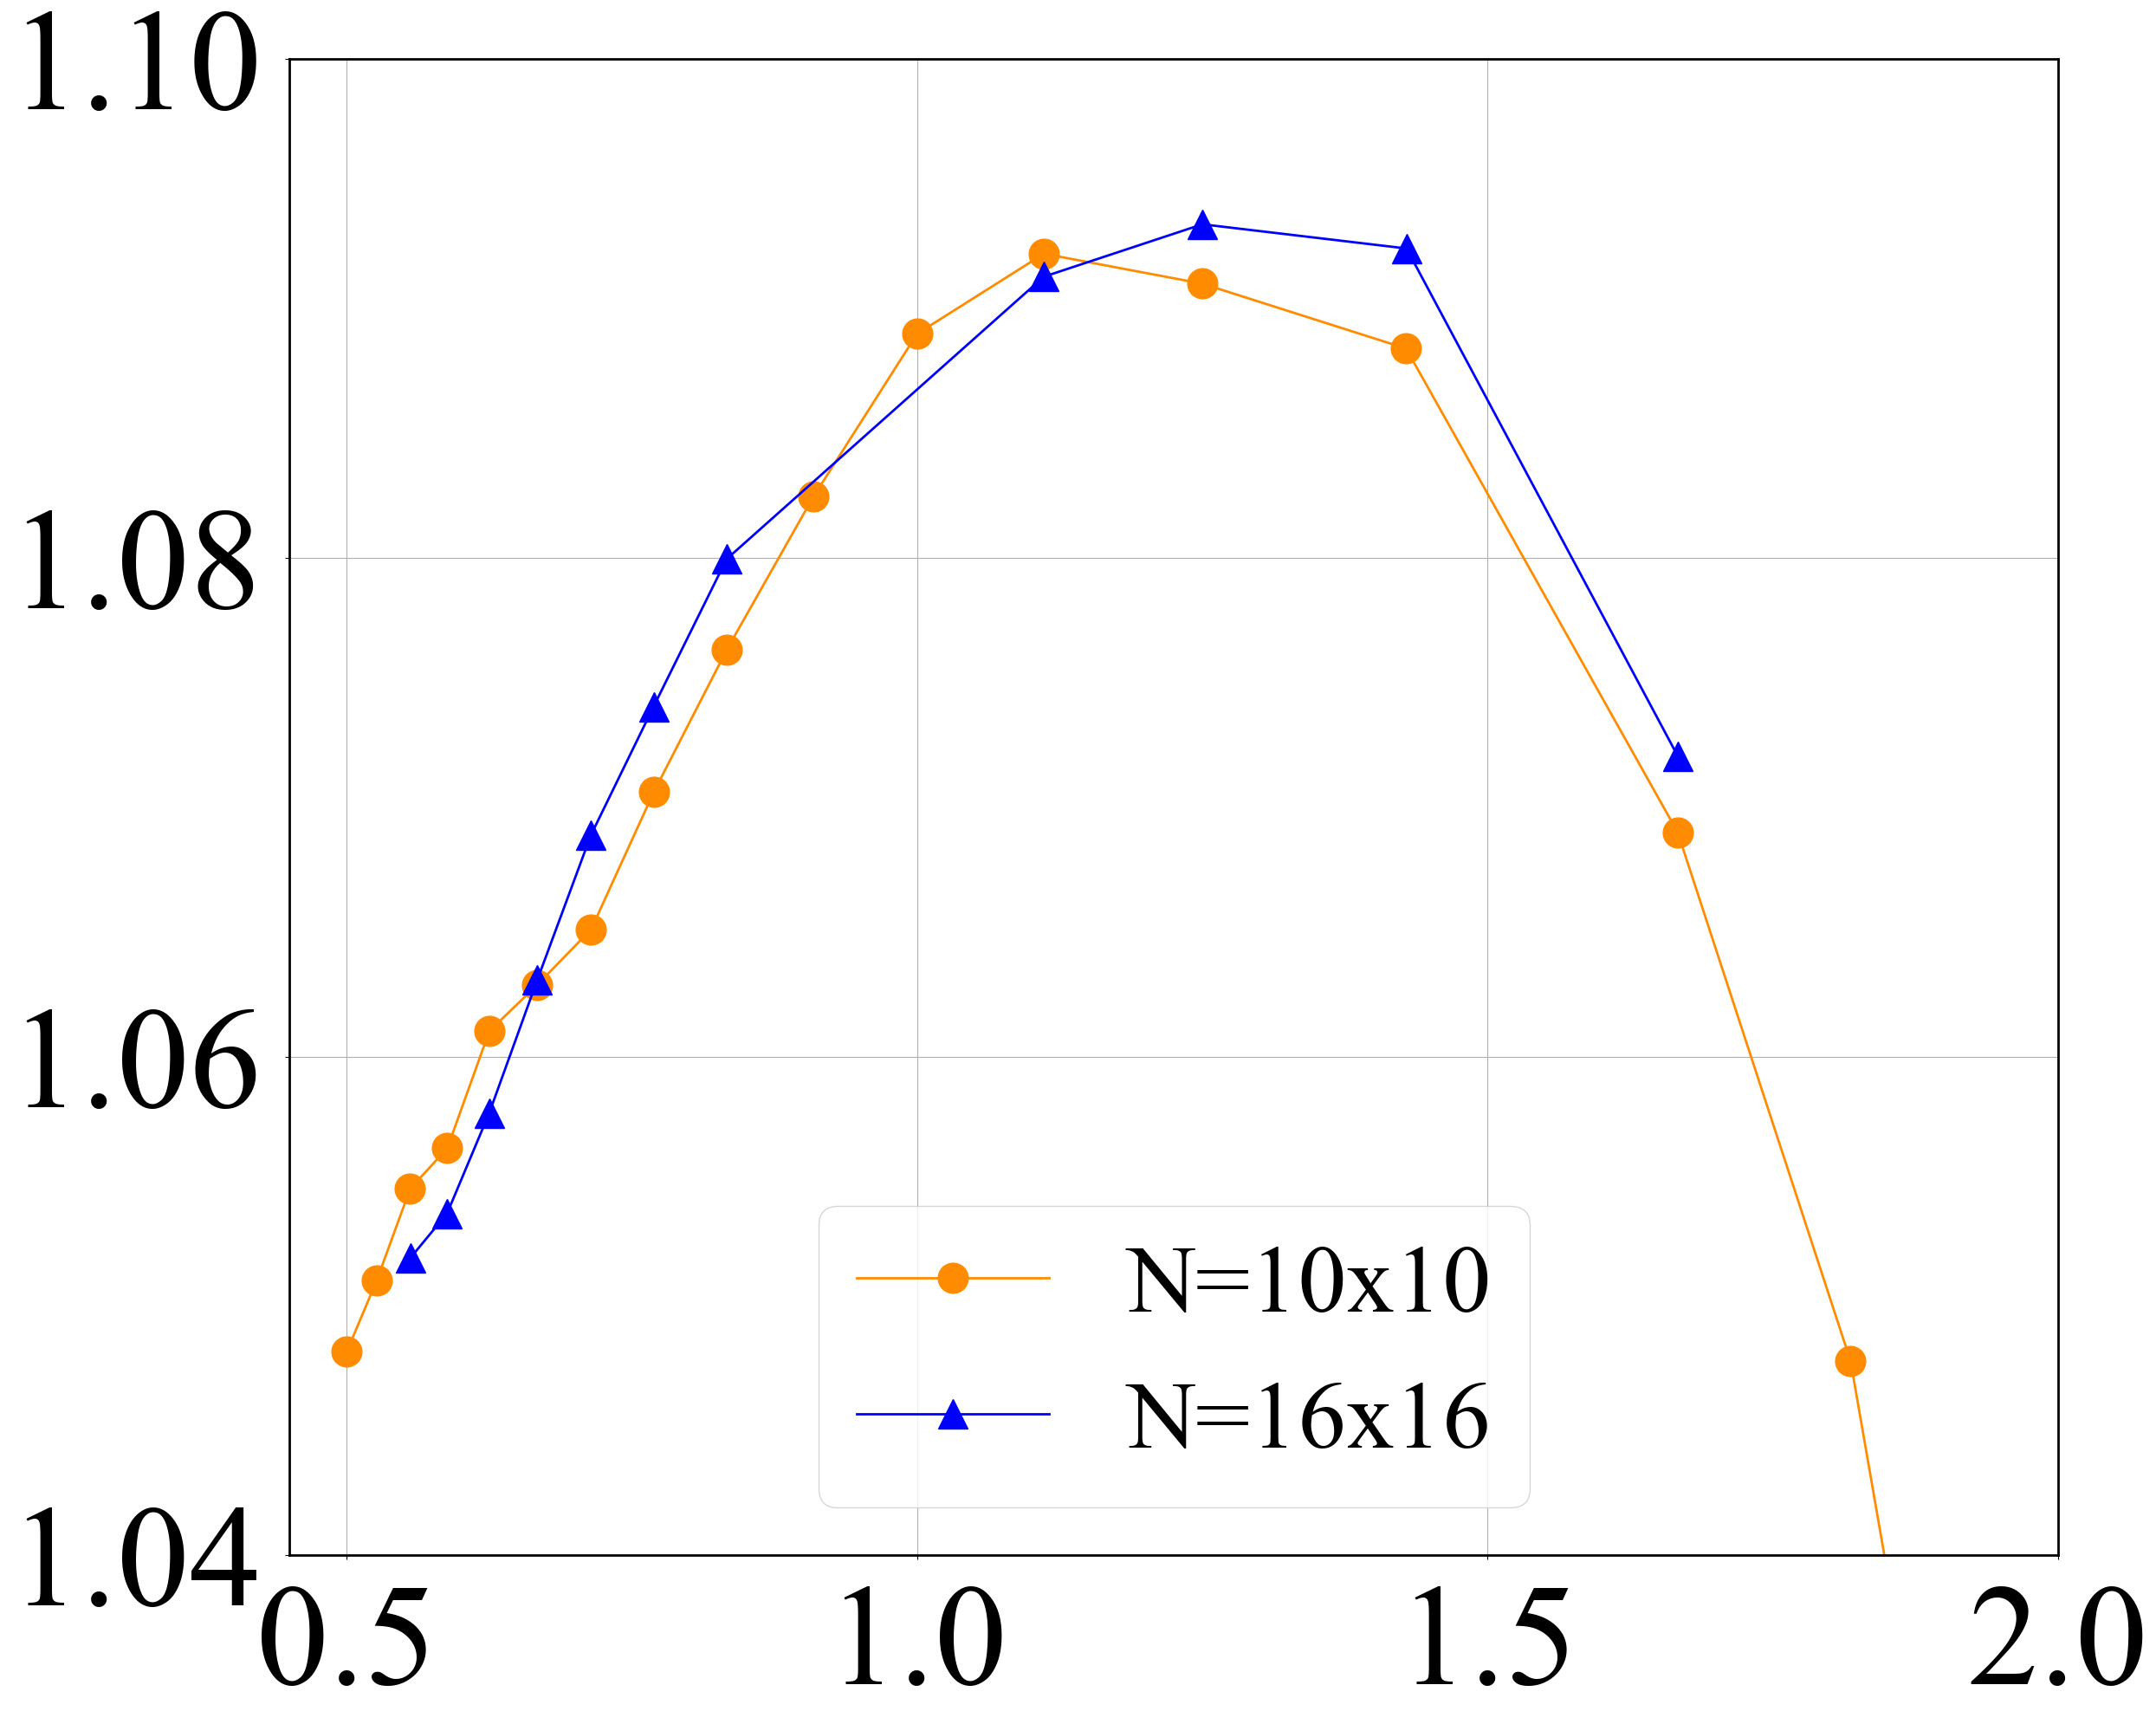

In [229]:
#n_c_low_16 = [1.0530645161290324, 1.0538709677419356, 1.0519354838709678, 1.0537096774193548, 1.057741935483871, 1.0630645161290324, 1.0688709677419357, 1.0740322580645163]
#T_low_16 = [0.5,0.526,0.556,0.588,0.625,0.667,0.714,0.769]
#n_c_high_16 = [1.0799460916442047, 1.0781671159029649, 1.082210242587601, 1.091266846361186, 1.0933692722371968, 1.092398921832884, 1.072021563342318,1.0506738544474392]
#T_high_16 = [0.833, 0.909, 1.0,1.111,1.25,1.429,1.667,2.0]

n_c_low_16 = [1.0519354838709678, 1.0537096774193548, 1.057741935483871, 1.0630645161290324, 1.0688709677419357, 1.0740322580645163]
T_low_16 = [0.556,0.588,0.625,0.667,0.714,0.769]

n_c_high_16 = [1.0799460916442047, 1.091266846361186, 1.0933692722371968, 1.092398921832884, 1.072021563342318]
T_high_16 = [0.833, 1.111,1.25,1.429,1.667]

n_c_16 = n_c_low_16+n_c_high_16
T_16 = T_low_16+T_high_16

N="16"
Graph_dir_kappa = "/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s_charge_gap"%N
if not os.path.exists(Graph_dir_kappa):
   os.makedirs(Graph_dir_kappa) 
    
plt.figure(figsize = (25,20))
plt.xticks([0.5,1.0,1.5,2.0],fontsize = 120)
plt.yticks([1.04,1.06,1.08,1.10],fontsize = 120)
plt.plot(T_val[:],nc_U6[:],c = 'darkorange',marker = "o",markersize= 25,linewidth = 2,label = "N=10x10")
plt.plot(T_16,n_c_16, c = 'blue', marker = "^", markersize = 25, linewidth = 2, label = "N=16x16")
#plt.plot(T_val,np.ma.masked_where(nc_U10<=1,nc_U10),c = 'red',marker = "s",markersize = 25,linewidth = 2,label = r"U=8.0")
plt.ylim(1.04,1.10)
plt.xlim(0.45,2.0)
plt.tick_params(axis='both', pad=20)
plt.grid(True,which='both')
plt.legend(loc = 'best',fontsize = 80)
plt.tight_layout()
plt.savefig("%s/MIT_crossover_critical_doping_finite_size_scaling.png"%(Graph_dir_kappa))

In [221]:
nc_4p5_high = [0.4085173501577287, 0.33596214511041,0.0015772870662457694, 0, 0,0,0]
nc_6_high = [0.9700315457413247, 1.0173501577287067, 1.036277602523659, 1.0078864353312305,0.9637223974763409, 0.7460567823343848,0.5410094637223973]
nc_8_high = [1.4337539432176656, 1.5157728706624607, 1.5694006309148267,1.610410094637224, 1.692429022082019, 1.6861198738170349,1.6514195583596214]
nc_10_high = [1.9620253164556953, 1.9968354430379749, 2.0253164556962022, 2.129746835443038, 2.231012658227848, 2.2594936708860764, 2.310126582278481]
T_high = [0.909,1.0,1.11,1.25,1.429,1.667,2.0]          

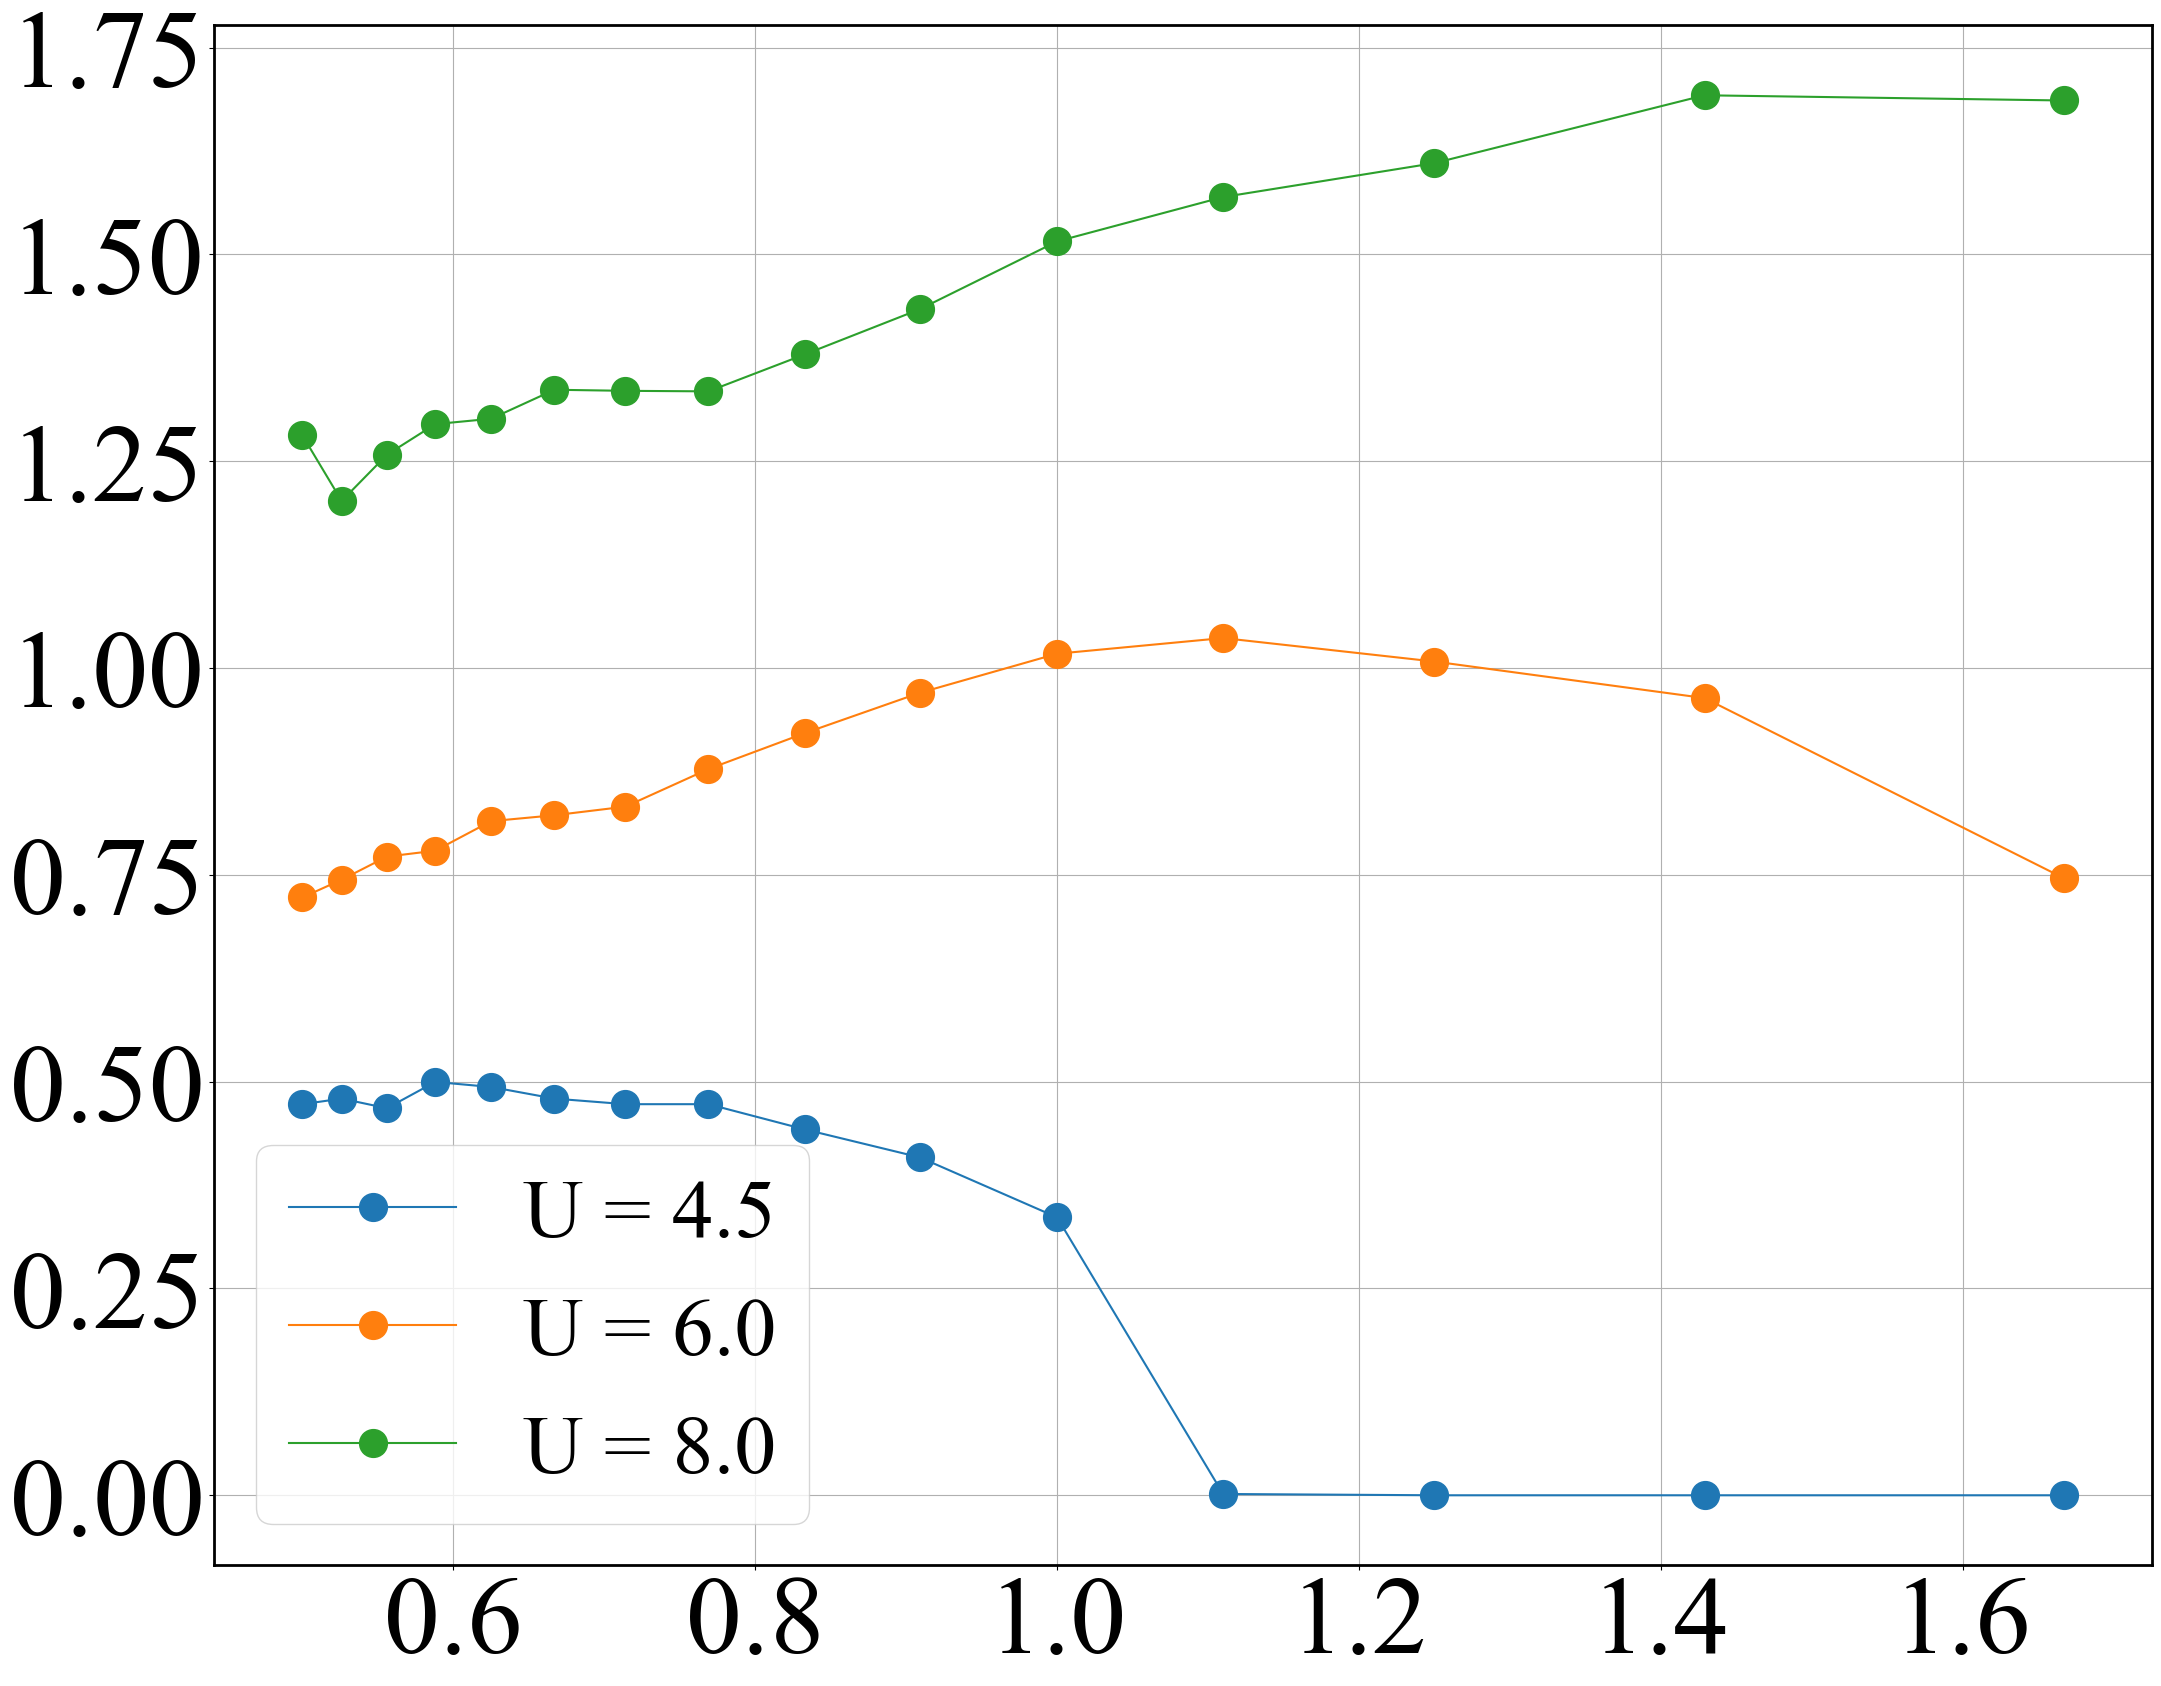

In [145]:
nc_4p5_low = [0.472782874617737,0.4795107033639143, 0.4678899082568807, 0.4996941896024465, 0.4935779816513761, 0.4795107033639143,0.472782874617737, 0.472782874617737,0.44220183486238535]
nc_6_low = [0.7227272727272727, 0.7441558441558441, 0.772077922077922, 0.7792207792207793, 0.814935064935065, 0.8220779220779221,0.8324675324675325,0.877922077922078,0.9214285714285715]
nc_8_low = [1.2812491272168691,1.20202834799609, 1.2578725038402458, 1.2948854908532328, 1.3013789973467393, 1.3364439324116744, 1.335145231112973,1.3344958804636224,1.379301075268817]
nc_10_low = [1.9549342105263157,1.8611842105263157, 1.925328947368421, 1.9249999999999998, 1.8914473684210527, 1.9055921052631577, 1.8871710526315788, 1.9167763157894735, 1.9404605263157892]
T_low = [0.5,0.526,0.556,0.588,0.625,0.667,0.714,0.769,0.833]
nc_4p5 = np.asarray(nc_4p5_low+nc_4p5_high)
nc_6 = np.asarray(nc_6_low+nc_6_high)
nc_8 = np.asarray(nc_8_low+nc_8_high)
nc_10 = np.asarray(nc_10_low+nc_10_high)
T_val = np.asarray(T_low+T_high)

plt.figure(figsize = (25,20))
plt.xticks(fontsize = 80)
plt.yticks(fontsize = 80)
plt.plot(T_val[:-1],nc_4p5[:-1],marker = "o",markersize = 20, label = "U = 4.5")
plt.plot(T_val[:-1],nc_6[:-1],marker = "o",markersize = 20, label = "U = 6.0")
plt.plot(T_val[:-1],nc_8[:-1],marker = "o",markersize = 20, label = "U = 8.0")
#plt.plot(T_val,nc_10,marker = "o",markersize = 20, label = "U = 10.0")
plt.legend(loc = 'best', fontsize = 60)
plt.grid(True, which = 'both')
